In [ ]:
import csv
import pandas as pd
import pathlib
import os
from sklearn.model_selection import train_test_split

foo = []
k=0
i = 0
#read files and clean up data
for subdir, dirs, files in os.walk(r'C:\Users\teotrelos99\Desktop\ted2\data'):
    for file in files:
        list = []
        dr=subdir.split('\\')
        drl=dr[len(dr)-1]

        cf = open(subdir + '/' + file, "r")

        for line in cf:
            line = line.strip()
            if(line):
                list.append(line)

        list = [j.replace('"', '') for j in list]
        list[1:len(list)] = [''.join(list[1:len(list)])]
        foo.append([i,list[0],",".join(list[1:len(list)]),drl])
        i += 1
        cf.close()

        
#split to train,test based on column 'Category'(stratify used)
y=[col[3] for col in foo]
x_train, x_test,y_train,y_test = train_test_split(foo,y, test_size = 0.2,stratify=y)


#create .tsv files
with open('./train0.tsv', 'w', encoding='utf8', errors='ignore') as file:
    tsv_writer = csv.writer(file, delimiter='\t')
    tsv_writer.writerow(['Id','Title','Content','Category'])

    for index in range(len(x_train)):
        tsv_writer.writerow(x_train[index])
    train = pd.read_csv('./train0.tsv', delimiter='\t')

with open('./test.tsv', 'w', encoding='utf8', errors='ignore') as file:
    tsv_writer = csv.writer(file, delimiter='\t')
    tsv_writer.writerow(['Id','Title','Content','Category'])
    for index in range(len(x_test)):
        tsv_writer.writerow(x_test[index])
    test = pd.read_csv('./test.tsv', delimiter='\t')
    
    test_dup=test.copy()
    test=test.drop(['Category'],axis=1)





In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from wordcloud import WordCloud, STOPWORDS

#classic creation of wordclouds,same code with the first exercise
def create_wordcloud(category):
    
    stop_words = set(STOPWORDS)
    stop_words.update(ENGLISH_STOP_WORDS)
    custom_stop_words=['said','told','look','saying']
    stop_words.update(custom_stop_words)

    cat=train[train['Category'].str.contains(category)]
    cat = cat['Content']
    cat_list = cat.values.tolist()
    for i in range(len(cat_list)):
        cat_list[i] = cat_list[i].lower()

    # Create and generate a word cloud image:
    cloud = WordCloud(background_color = 'black', mode = 'RGB', stopwords = stop_words, width = 1920, height = 1080, collocations = False)
    wordcloud = cloud.generate(' '.join(cat_list))

    plt.figure(figsize = (19,10), facecolor = None)
    plt.title(category)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    
    


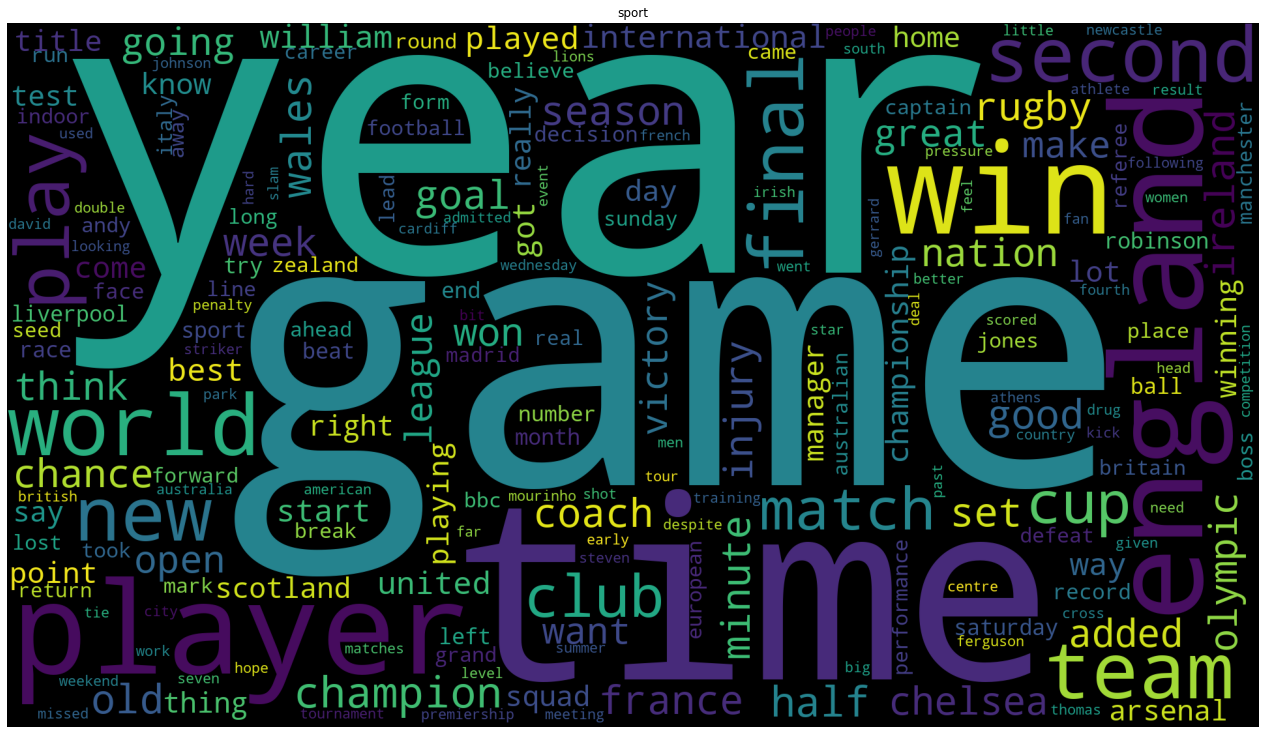

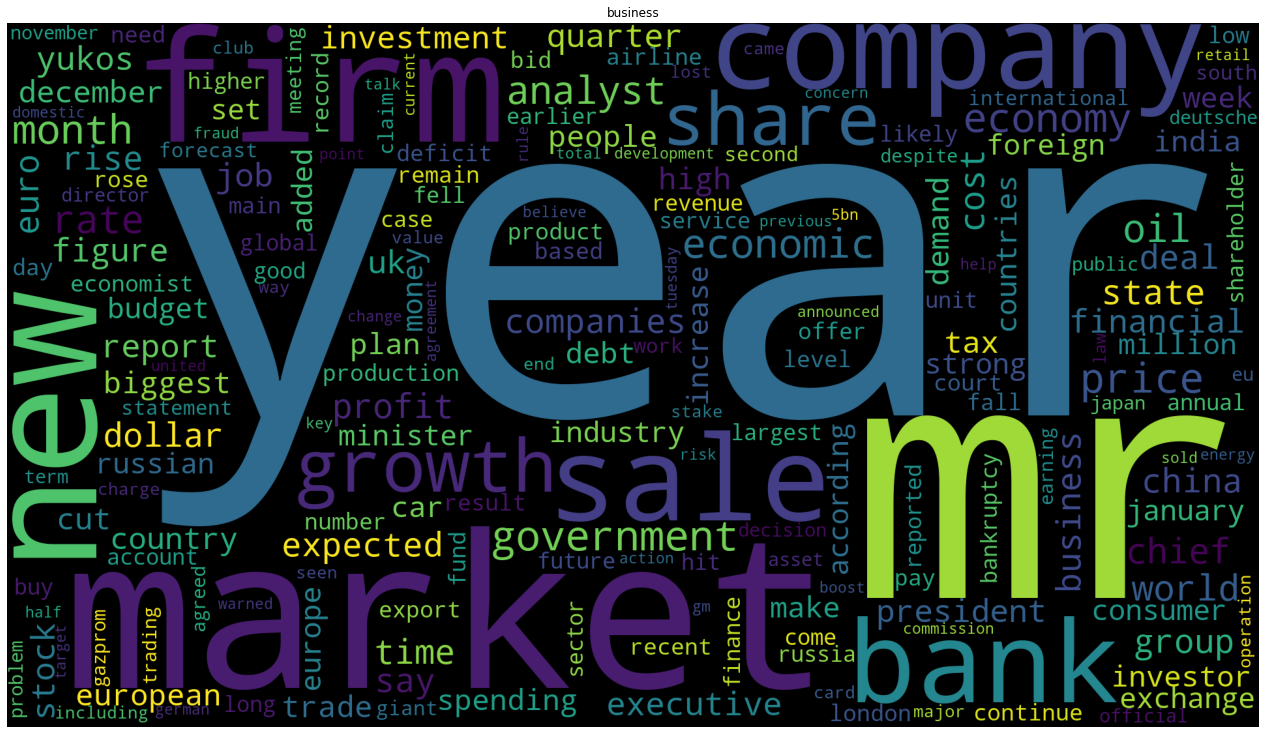

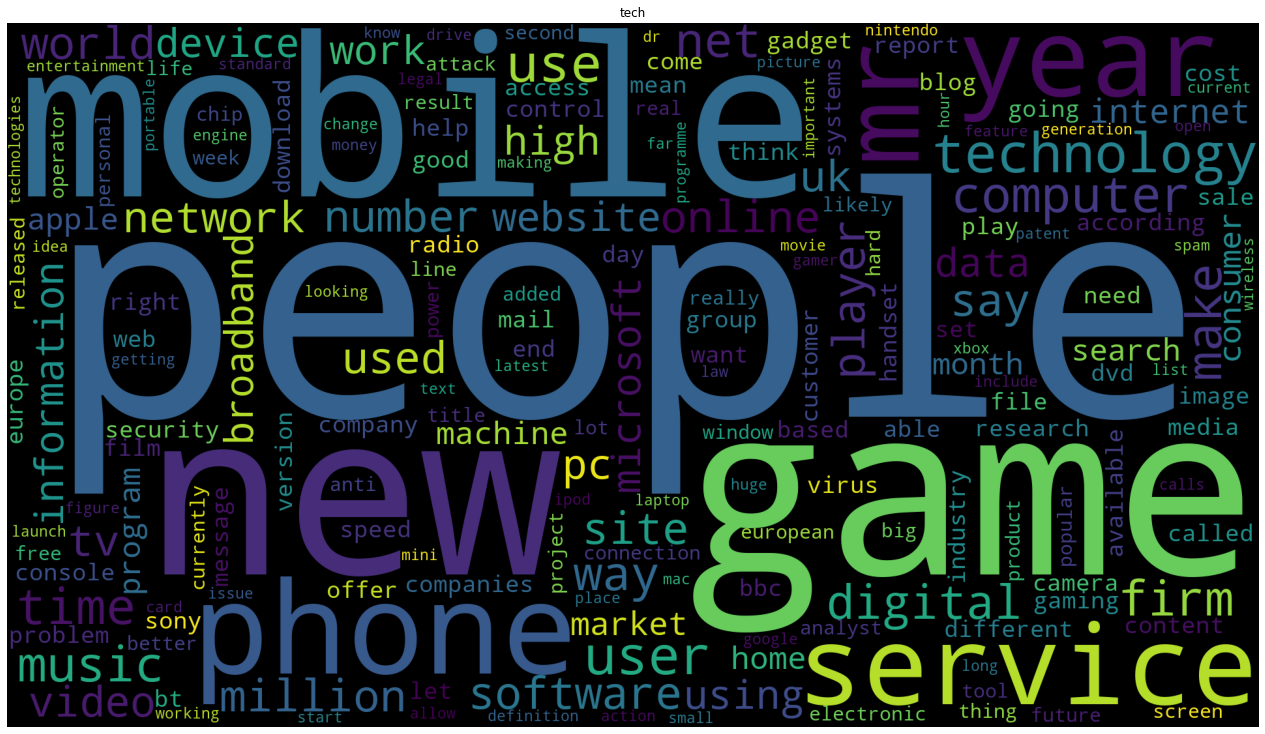

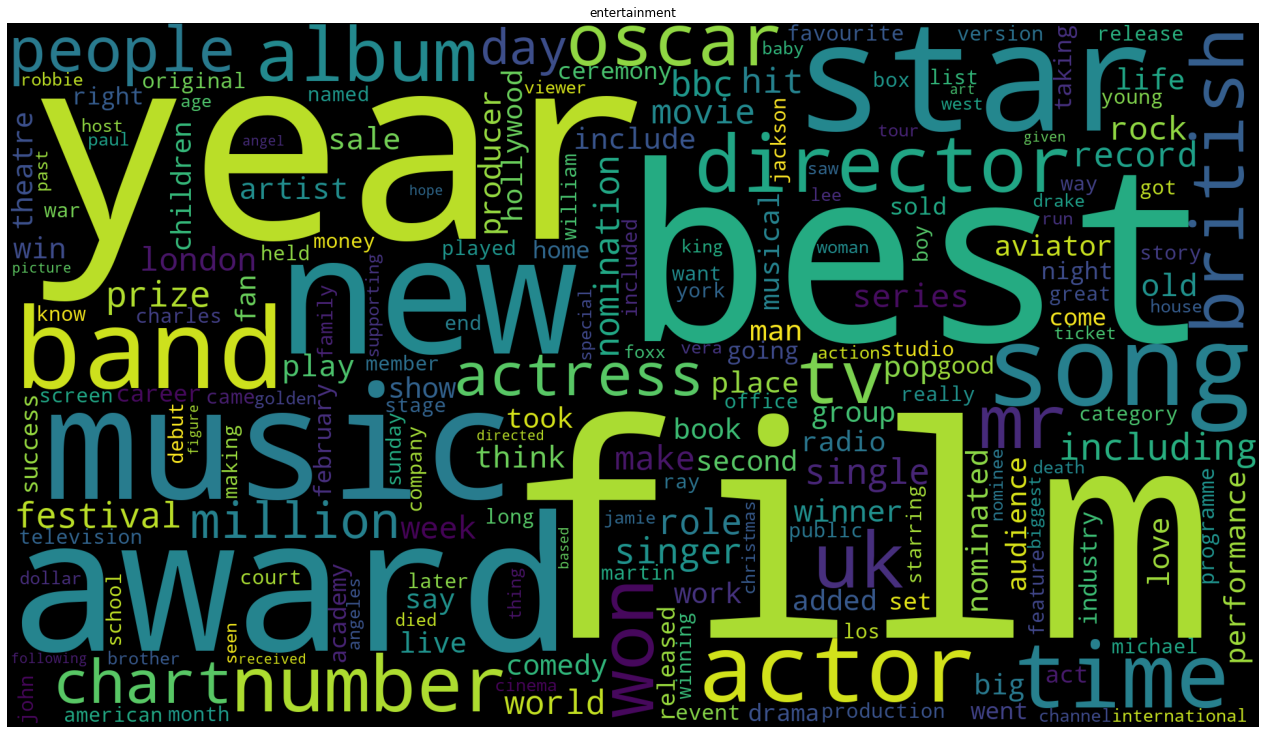

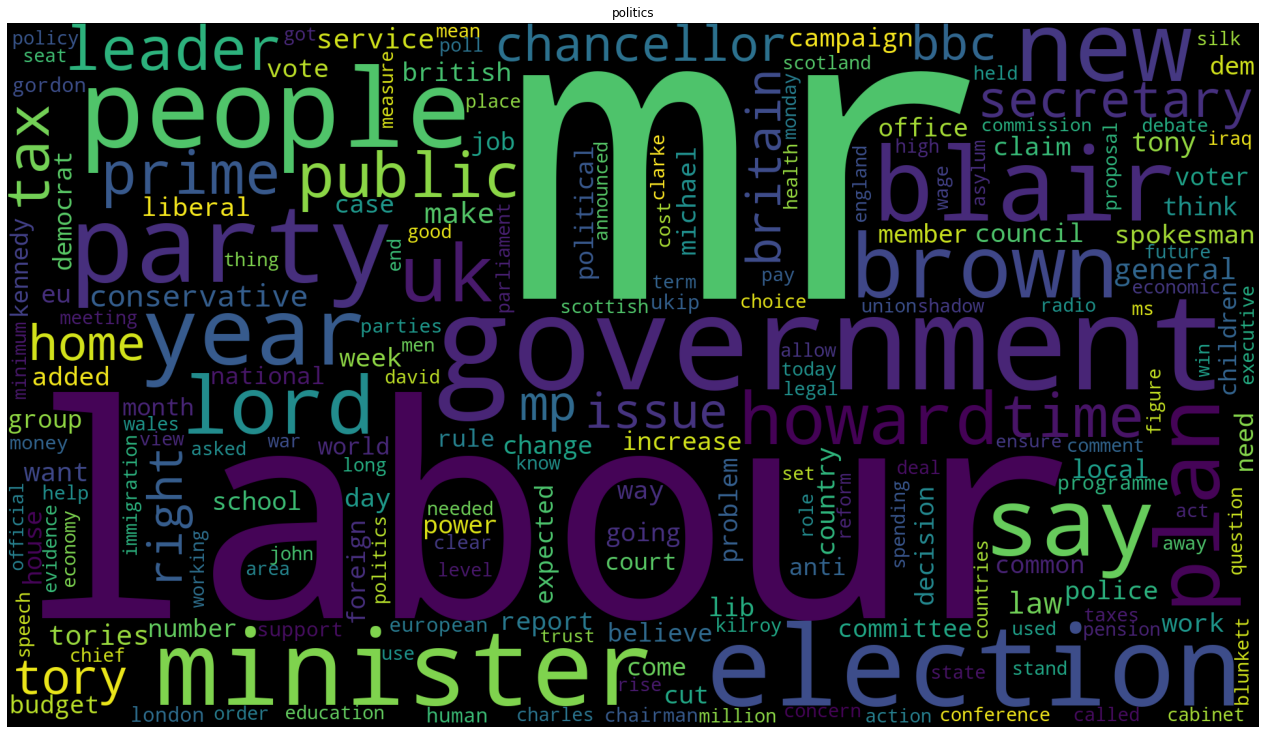

In [ ]:
create_wordcloud('sport')
create_wordcloud('business')
create_wordcloud('tech')
create_wordcloud('entertainment')
create_wordcloud('politics')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer



stop_words = set(STOPWORDS)
stop_words.update(ENGLISH_STOP_WORDS)
custom_stop_words=['said','told','look','saying']
stop_words.update(custom_stop_words)


#creation of bag-of-words(count-vec)
count_vec = CountVectorizer(stop_words=stopwords,analyzer='word',lowercase=True)
cvec = count_vec.fit_transform(train['Content'])

#creation of tf-idf-vec
tfidf_vec = TfidfVectorizer(stop_words = stopwords,lowercase=True)
tvec = tfidf_vec.fit_transform(train['Content'])

#storing category of each document into a list
train_cat = train['Category'].tolist()


#preparing test content in order to make predictions
test_class_cvec = count_vec.transform(test['Content'])
test_class_tvec = tfidf_vec.transform(test['Content'])

#storing all different categories
n_classes = test_dup['Category'].drop_duplicates(keep='first').tolist()

In [ ]:
#validating our methods based on required metrics
def Validation(est,vec,label):
    scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro']

    results = cross_validate(estimator=est, X=vec , y=label, cv=10,scoring=scoring )

    k=0
    for r in results:
        if k>1:
            print(r+' : '+str(results[r].mean()))

        k+=1

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn import naive_bayes
import seaborn as sns
import sklearn
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(20, 15)):
    if (isinstance(clf, sklearn.ensemble.RandomForestClassifier))or(isinstance(clf, sklearn.naive_bayes.MultinomialNB)):
        y_score=clf.predict_proba(X_test)
    else:
        y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(len(n_classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC plot')
    for i in range(len(n_classes)):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %s' % (roc_auc[i], n_classes[i]))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()





COUNTS :
test_accuracy : 0.9533707865168539
test_f1_macro : 0.9522023530512402
test_precision_macro : 0.9545007480732467
test_recall_macro : 0.9524175728334392


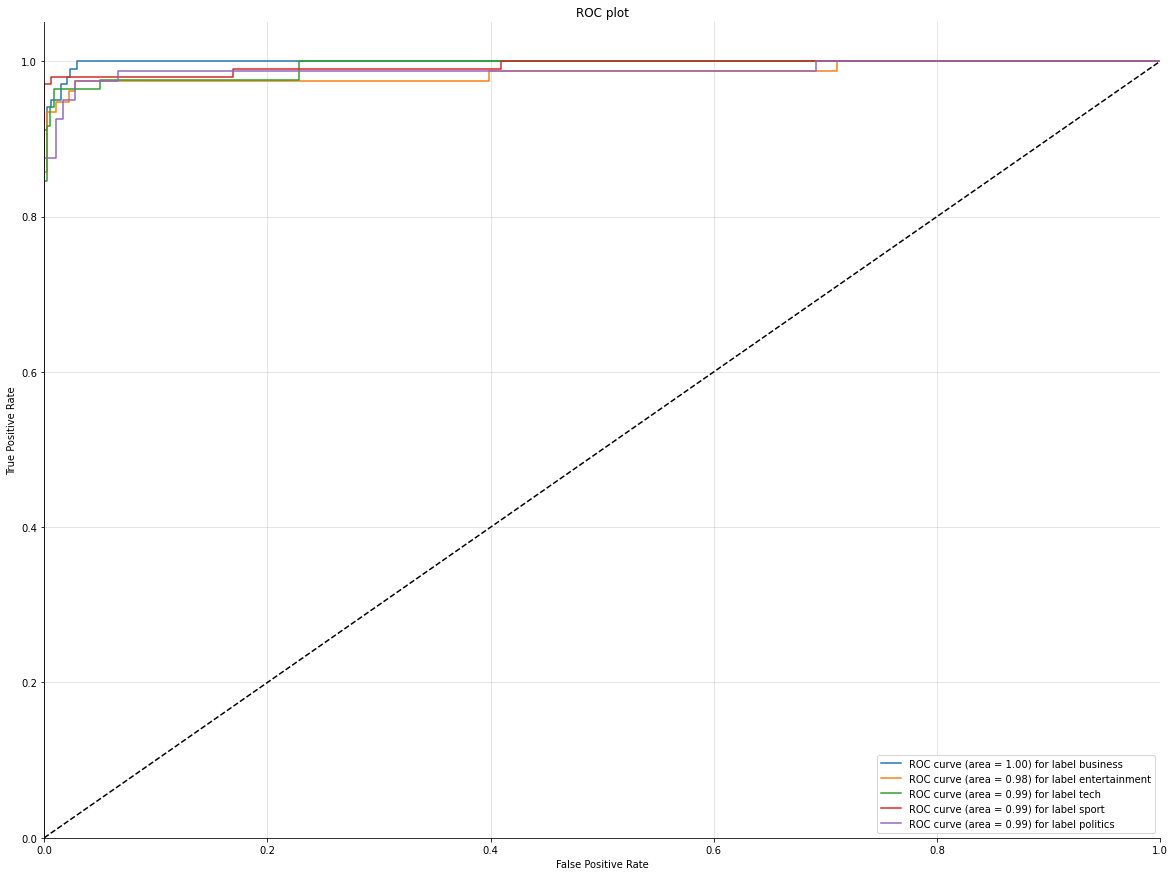

TFIDF :
test_accuracy : 0.9797752808988763
test_f1_macro : 0.97963409038917
test_precision_macro : 0.9799562509080374
test_recall_macro : 0.9797893967793827


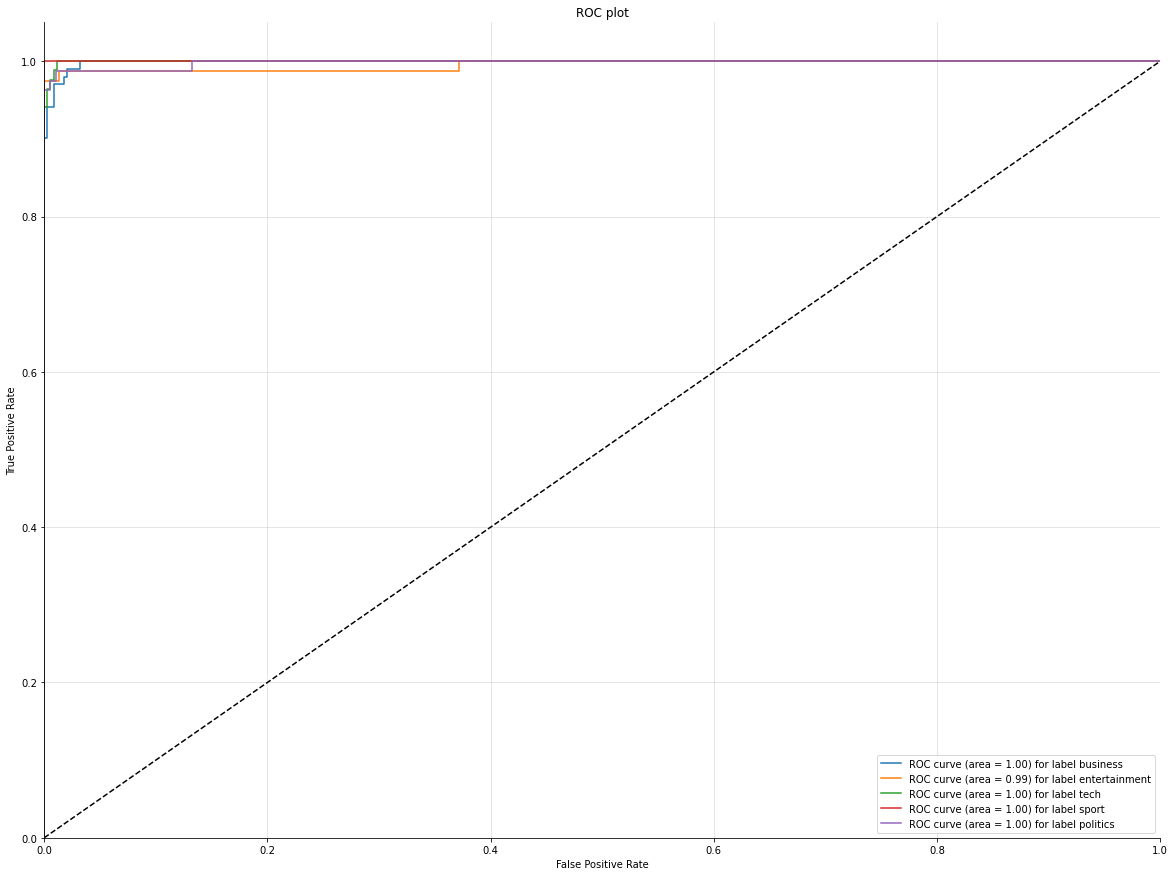

In [ ]:
#------------------SVM--------------------------#
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn import metrics
import warnings
import numpy as np

warnings.simplefilter(action='ignore', category=FutureWarning)
#Support Vector Machine classification method applied to a count vectorizer
clf = svm.SVC()
clf.fit(cvec, train_cat)


print("COUNTS :")
Validation(clf,cvec,train_cat)
plot_multiclass_roc(clf,test_class_cvec,test_dup['Category'],n_classes)


#Support Vector Machine classification method applied to a tfidf vectorizer
clf = svm.SVC(kernel='linear',gamma='auto')
clf.fit(tvec, train_cat)

print("TFIDF :")
Validation(clf,tvec,train_cat)
plot_multiclass_roc(clf,test_class_tvec,test_dup['Category'],n_classes)



#------------------SVM--------------------------#

COUNTS :
test_accuracy : 0.9578651685393259
test_f1_macro : 0.957278457346548
test_precision_macro : 0.9610436798759384
test_recall_macro : 0.9552568035260739


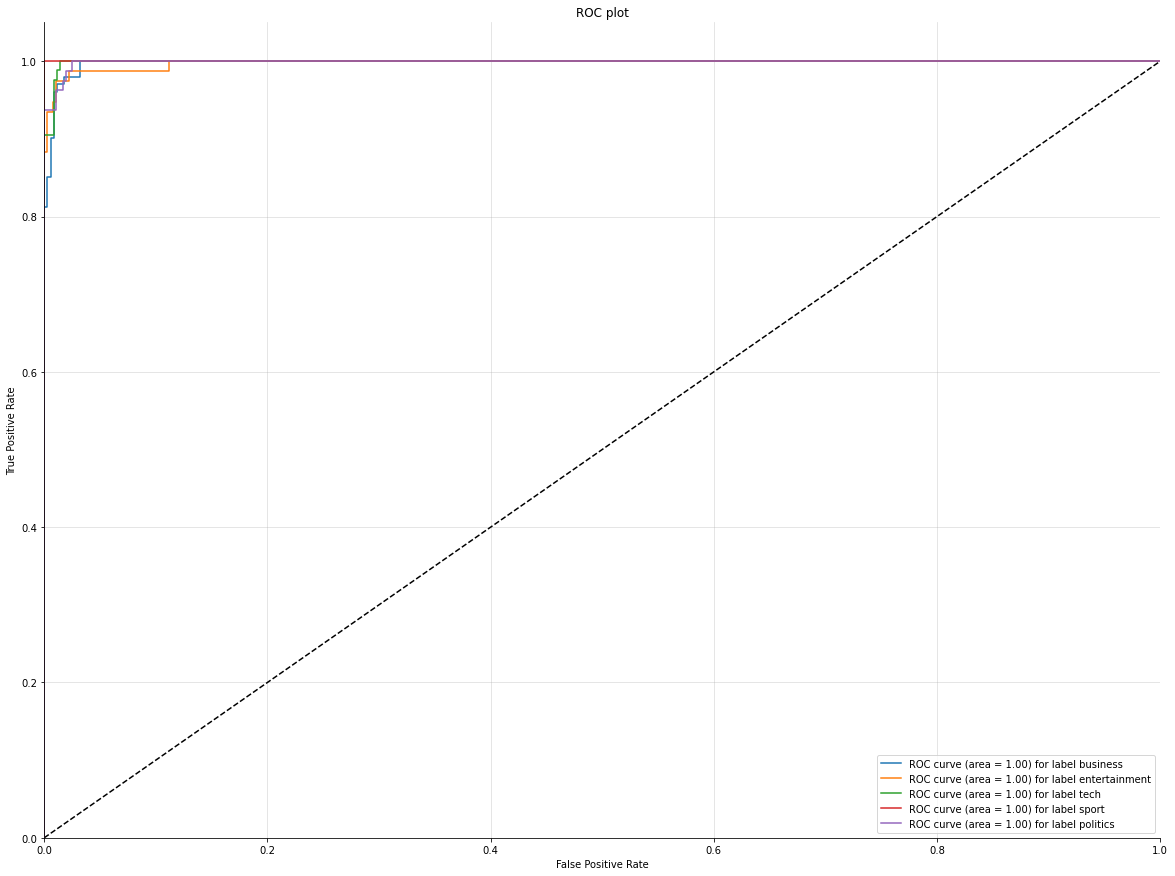

TFIDF :
test_accuracy : 0.9539325842696631
test_f1_macro : 0.9530787435913535
test_precision_macro : 0.9574473608011903
test_recall_macro : 0.9509605969095313


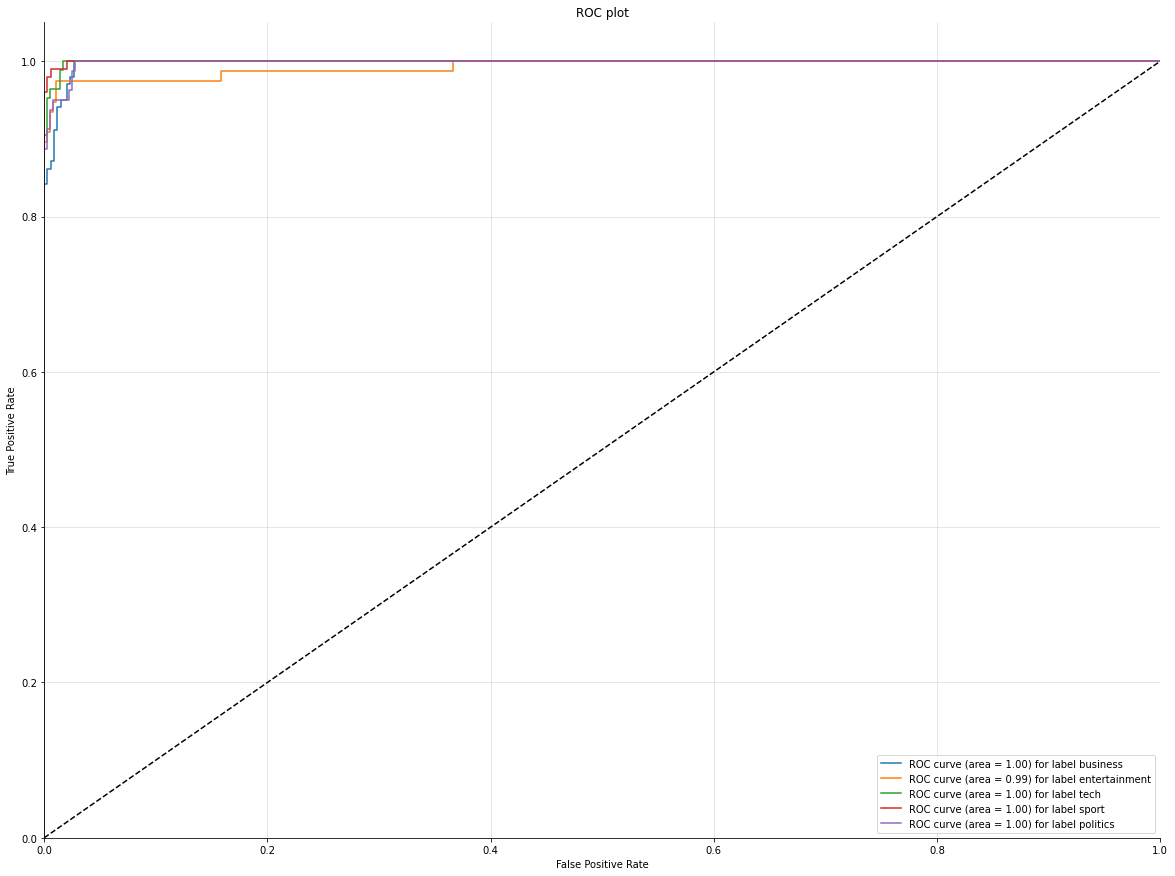

In [ ]:
#------------------RF--------------------------#
from sklearn.ensemble import RandomForestClassifier
#Random Forest classification method applied to a count vectorizer
clf=RandomForestClassifier(max_depth=20)
clf.fit(cvec, train_cat)

#Examining the accuracy of the method
#And printing metrics, and roc-plot
print("COUNTS :")
Validation(clf, cvec, train_cat)
plot_multiclass_roc(clf, test_class_cvec,test_dup['Category'], n_classes)
 
#Random Forest classification method applied to a tf-idf vectorizer
clf=RandomForestClassifier(max_depth=20)
clf.fit(tvec,train_cat)

#Examining the accuracy of the method
#And printing metrics, and roc-plot
print("TFIDF :")
Validation(clf, tvec, train_cat)
plot_multiclass_roc(clf, test_class_tvec, test_dup['Category'], n_classes)
#------------------RF--------------------------#

COUNTS :
test_accuracy : 0.9752808988764043
test_f1_macro : 0.9745436797488711
test_precision_macro : 0.9752031979894247
test_recall_macro : 0.9752014519705314


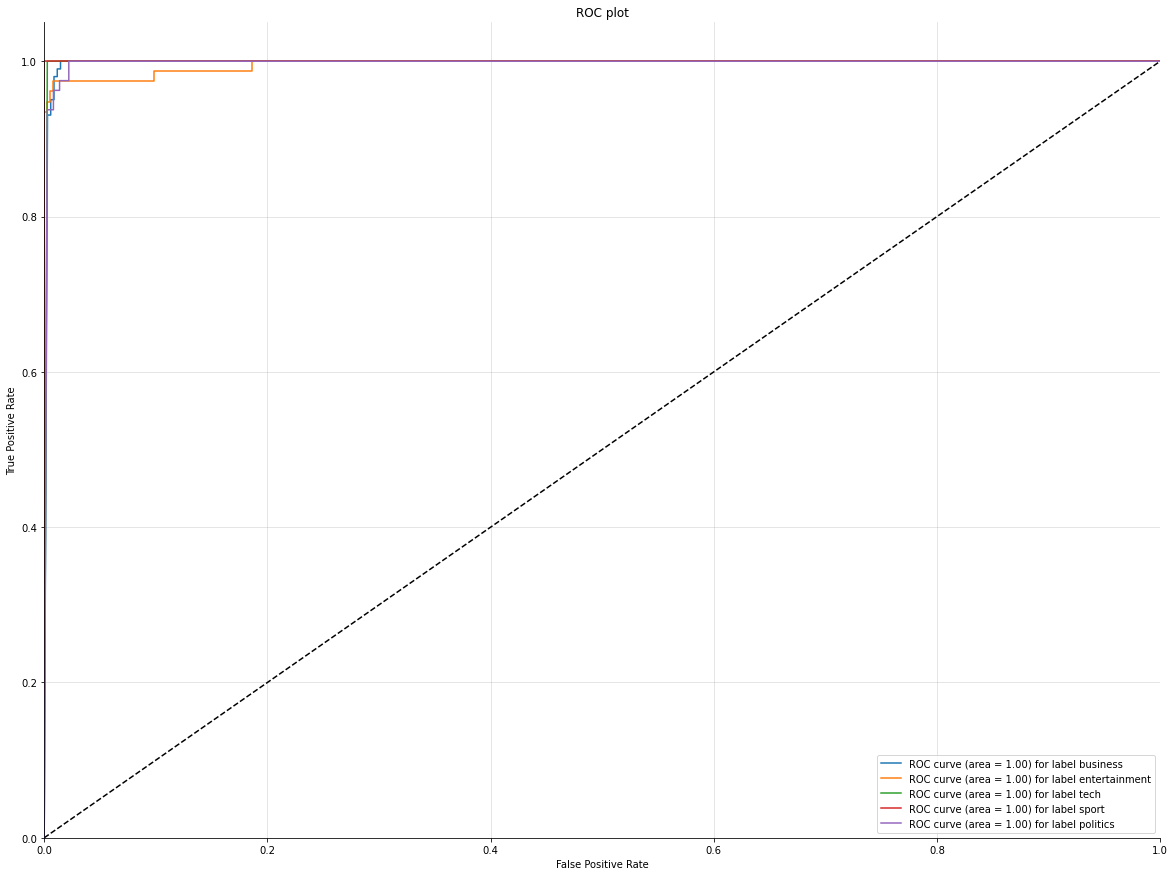

TFIDF :
test_accuracy : 0.9668539325842698
test_f1_macro : 0.9658824077075214
test_precision_macro : 0.9683557813429735
test_recall_macro : 0.9649473259227157


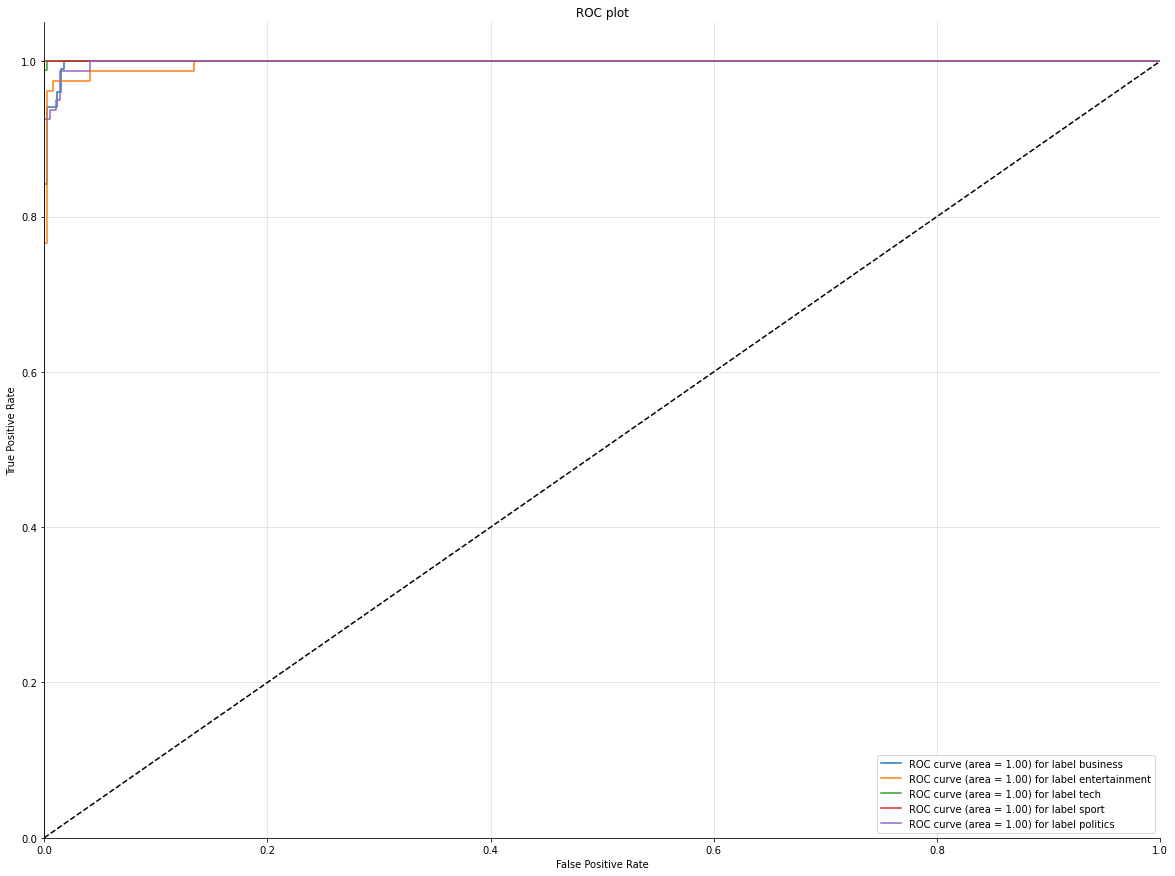

In [ ]:
#------------------NB--------------------------#
from sklearn.naive_bayes import MultinomialNB


#Naive Bayes classification method applied to a count vectorizer
clf = MultinomialNB()
clf.fit(cvec, train_cat)

#Examining the accuracy of the method
#And printing metrics, and roc-plot
print("COUNTS :")
Validation(clf, cvec, train_cat) 
plot_multiclass_roc(clf, test_class_cvec, test_dup['Category'], n_classes)



#Naive Bayes classification method applied to a tfidf vectorizer
clf = MultinomialNB()
clf.fit(tvec, train_cat)

#Examining the accuracy of the method
#And printing metrics, and roc-plot
print("TFIDF :")
Validation(clf, tvec, train_cat)
plot_multiclass_roc(clf, test_class_tvec, test_dup['Category'], n_classes)

#------------------NB--------------------------#

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
import operator
import itertools
from collections import Counter
from operator import itemgetter

def knn(test_class,vec,train,k):

    dist = euclidean_distances(test_class,vec)

    #2d array
    temp = [[0 for x in range(dist.shape[1])] for y in range(dist.shape[0])]

    #storing every distance along with the index,so we can keep track of the pairs(otherwise they would get lost in sorting function)
    for i in range(dist.shape[0]):
        for j in range(dist.shape[1]):
            temp[i][j] = (dist[i][j],j)


    topk = []
   
   #for every document keep top-k closest neighbours
    for index in range(len(dist)):
        dist[index] = sorted(dist[index])
        topk.append(dist[index][:k])
        
    
        
    gList = []
    predictions = []

     
        
        
    results = []
    maj_votes = []
    
    #majority voting:out of top k neighbours keep as prediction the most frequent category
    #inside loop,we keep count of every category
    for i in range(dist.shape[0]):
        dic = {}
        for m in range(0,k):
            for j in range(dist.shape[1]):
                if(temp[i][j][0] == topk[i][m]):
                    if train.at[j,'Category'] in dic:
                        dic[train.at[j,'Category']] += 1
                    else:
                        dic[train.at[j,'Category']] = 1
                        
                    break
                              
        #and here we pick the most frequent one
        {l: v for l, v in sorted(dic.items(), key=lambda item: item[1])}
        results.append(next(iter(dic)))
        
    return results


    
  

    

In [ ]:
from sklearn.metrics import confusion_matrix


def cmValidation(g, test):
    ADoul = {'business' : 0, 'entertainment' : 1, 'politics' : 2, 'sport' : 3, 'tech' : 4}
    y_actu = []
    y_pred = []
    #creating confusion matrix
    for i in range(len(test)):
        y_actu.append(ADoul[test.at[i,'Category']])
        y_pred.append(ADoul[g[i]])
    cnf_matrix = confusion_matrix(y_actu, y_pred)


    #false-positive,false-negative,true-positive,true-negative
    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)


    #calculating metrics for custom knn
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    accuracy = (TP+TN)/(TP+FP+FN+TN)
    f1_score = (2 * precision * recall)/(precision + recall)
    
    return accuracy.mean(), precision.mean(),recall.mean(),f1_score.mean()
    
    

In [ ]:
from sklearn.model_selection import KFold
from sklearn import preprocessing 
def customkfold(train,test,vec,k):
    
    #this ia a custom 10-fold,every time we split the dataset in a different way
    #then we transform the data into vectorizers,then we calculate the metrics
    
    bigdata = pd.concat([train, test], ignore_index=True, sort =False)
    bigdata=train
    # prepare cross validation
    kfold = KFold(10, False, 1)
    
    metric_dic={'accuracy':0,'precision':0,'recall':0,'f1_score':0}

    # enumerate splits
    for tr, te in kfold.split(bigdata):
        
        new_train=bigdata.loc[tr[0]:tr[-1],:].reset_index()
        new_test=bigdata.loc[te[0]:te[-1],:].reset_index()
        
        
        final_vec=vec.fit_transform(new_train['Content'])
        

        test_class= vec.transform(new_test['Content'])
        
        


        g = knn(test_class, final_vec,new_train,k)
        accuracy,precision,recall,f1_score=cmValidation(g, new_test)
 
        metric_dic['accuracy']+=accuracy
        metric_dic['precision']+=precision
        metric_dic['recall']+=recall
        metric_dic['f1_score']+=f1_score
 
        
    print('accuracy : ' + str(metric_dic['accuracy']/10))
          
    print('precision : ' + str(metric_dic['precision']/10))
          
    print('recall : ' +  str(metric_dic['recall']/10))
          
    print('f1_score : ' +  str(metric_dic['f1_score']/10))
    
    print("\n\n")
        
        


In [ ]:
#------------------KNN--------------------------#

print("COUNTS :")
customkfold(train, test_dup, count_vec,10)
print("TFIDF :")
customkfold(train, test_dup, tfidf_vec,10)

#------------------KNN--------------------------#

COUNTS :
accuracy : 0.9712359550561798
precision : 0.9527902819989776
recall : 0.9323401514318664
f1_score : 0.9297756872054259



TFIDF :
accuracy : 0.992134831460674
precision : 0.979159245585247
recall : 0.9799739413922086
f1_score : 0.9793389789945575





In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer


#beat the benchmark
#we chose to improve our KNN custom classifier
#we use lemmatization and stemming to both countvectorizer and tfidf vectorizer
#there is significant improvement in all metrics

stopwords = set(ENGLISH_STOP_WORDS)

class LemmaTokenizer(object):
    
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc) if t not in ENGLISH_STOP_WORDS]




stemmer = SnowballStemmer("english")
df = train.copy()
df['Content'] = train['Content'].apply(stemmer.stem) # stem every word

count_vec2 = CountVectorizer(stop_words=stopwords,analyzer='word',tokenizer=LemmaTokenizer())
cvec2 = count_vec2.fit_transform(df['Content'])

print("COUNTS :")
customkfold(df, test_dup, count_vec2,10)



stemmer = SnowballStemmer("english")
df = train.copy()
df['Content'] = train['Content'].apply(stemmer.stem) # stem every word

tfidf_vec2=TfidfVectorizer(stop_words=stopwords,analyzer='word',tokenizer=LemmaTokenizer())
tvec2=tfidf_vec2.fit_transform(df['Content'])

print("TFIDF :")
customkfold(df, test_dup, tfidf_vec2,10)




COUNTS :
accuracy : 0.9800000000000001
precision : 0.963930991542352
recall : 0.9494916351863146
f1_score : 0.9521332152876075



TFIDF :
accuracy : 0.9939325842696627
precision : 0.9832433825920667
recall : 0.9844576826551474
f1_score : 0.9837156506576223





In [ ]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import math
from matplotlib.colors import ListedColormap


def plot_clusters(X, y_pred, centers,train):
    plt.style.use('fivethirtyeight')
    f, ax1 = plt.subplots(1, 1, figsize=( 25, 25), facecolor='white')
    ax1.set_xlabel("")
    ax1.set_ylabel("")
    ax1.set_title("K-Means")
    LABEL_COLOR_MAP = {0 : 'red',
                   1 : 'green',
                   2:'blue',
                   3:'purple',
                   4:'brown'
                   }

    label_color = [LABEL_COLOR_MAP[l] for l in y_pred]
    # Only plots the first 2 dimensions of the  matrix
    ax1.scatter(X[:,0], X[:,1], c=label_color, cmap=plt.cm.Paired, s=45)
    ax1.scatter(centers[:, 0], centers[:, 1], marker='o', c="black", alpha=1, s=100)

  
    ax1.axis('off')
    
    
    red_patch = mpatches.Patch(color='red', label='0')
    green_patch = mpatches.Patch(color='green', label='1')
    blue_patch = mpatches.Patch(color='blue', label='2')
    purple_patch = mpatches.Patch(color='purple', label='3')
    black_patch = mpatches.Patch(color='brown', label='4')
    
    
    #Popup in each spot,which reveals the category that each document belong
    n = train['Category'].tolist()
    for i, text in enumerate(n):
        if(i == svdX.shape[0]):
            break
        ax1.annotate(text[0], (X[i, 0], X[i, 1]))
        

    plt.legend(handles=[red_patch, blue_patch, green_patch,purple_patch,black_patch],title='Cluster Teams')

    
    
    plt.show()


In [ ]:
from sklearn import preprocessing  
from sklearn.cluster import KMeans
from sklearn.utils.extmath import randomized_svd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
import numpy as np
import scipy
from sklearn.decomposition import IncrementalPCA
from scipy import sparse
from sklearn.decomposition import FastICA

def compression(vec):
    
    #this function uses 3 different compression techniques(SVD,PCA,ICA)
    #So,for every vectorizer we have 3 different plots,one for every compression method.
    #On the whole,we have a total of 9 different cluster plots.
    #The combinations are every pair that can be created from :
    #(Counts-Vectorizer,TfIdf-Vectorizer,Word2Vec) (SVD,PCA,ICA)

 


    #Normalizing vectorizer and using K-means with euclidian distance
    #is equivalent to using K-means with Cosine similarity.
    #This approach was accepted in e-class discussions.
    norm_train = preprocessing.normalize(vec)
    
    
    
    svd  = TruncatedSVD(n_components=2, random_state= 10)
    svdX = svd.fit_transform(norm_train)
   

    km = KMeans(n_clusters=5, init='k-means++', 
                max_iter=100, n_init=1, verbose=0, random_state=3425).fit(svdX)

    a=km.predict(svdX)
    centers=km.cluster_centers_
    plot_clusters(svdX,a,centers,train)


  


    #incremental PCA used in order to avoid running out of memory
    #This method takes data in batches,and produces the same result
    #with the common PCA

    pca = IncrementalPCA(n_components=2, batch_size=300)
    pca_result=pca.fit_transform(norm_train)
    

    km = KMeans(n_clusters=5, init='k-means++', 
                max_iter=100, n_init=1, verbose=0, random_state=3425).fit(pca_result)

    a=km.predict(pca_result)
    centers=km.cluster_centers_
    plot_clusters(pca_result,a,centers,train)
    
    
    
    
    
    ica=FastICA(n_components=2,random_state=0)
    
  
    #depending on vectorizer instance might differ
    if isinstance(norm_train, np.ndarray):
        ica_result = ica.fit_transform(norm_train)
    else:
        ica_result = ica.fit_transform(norm_train.toarray())
    
    
    km = KMeans(n_clusters=5, init='k-means++', 
                max_iter=100, n_init=1, verbose=0, random_state=3425).fit(ica_result)

    a=km.predict(ica_result)
    centers=km.cluster_centers_
    plot_clusters(ica_result, a, centers,train)
    

    
    



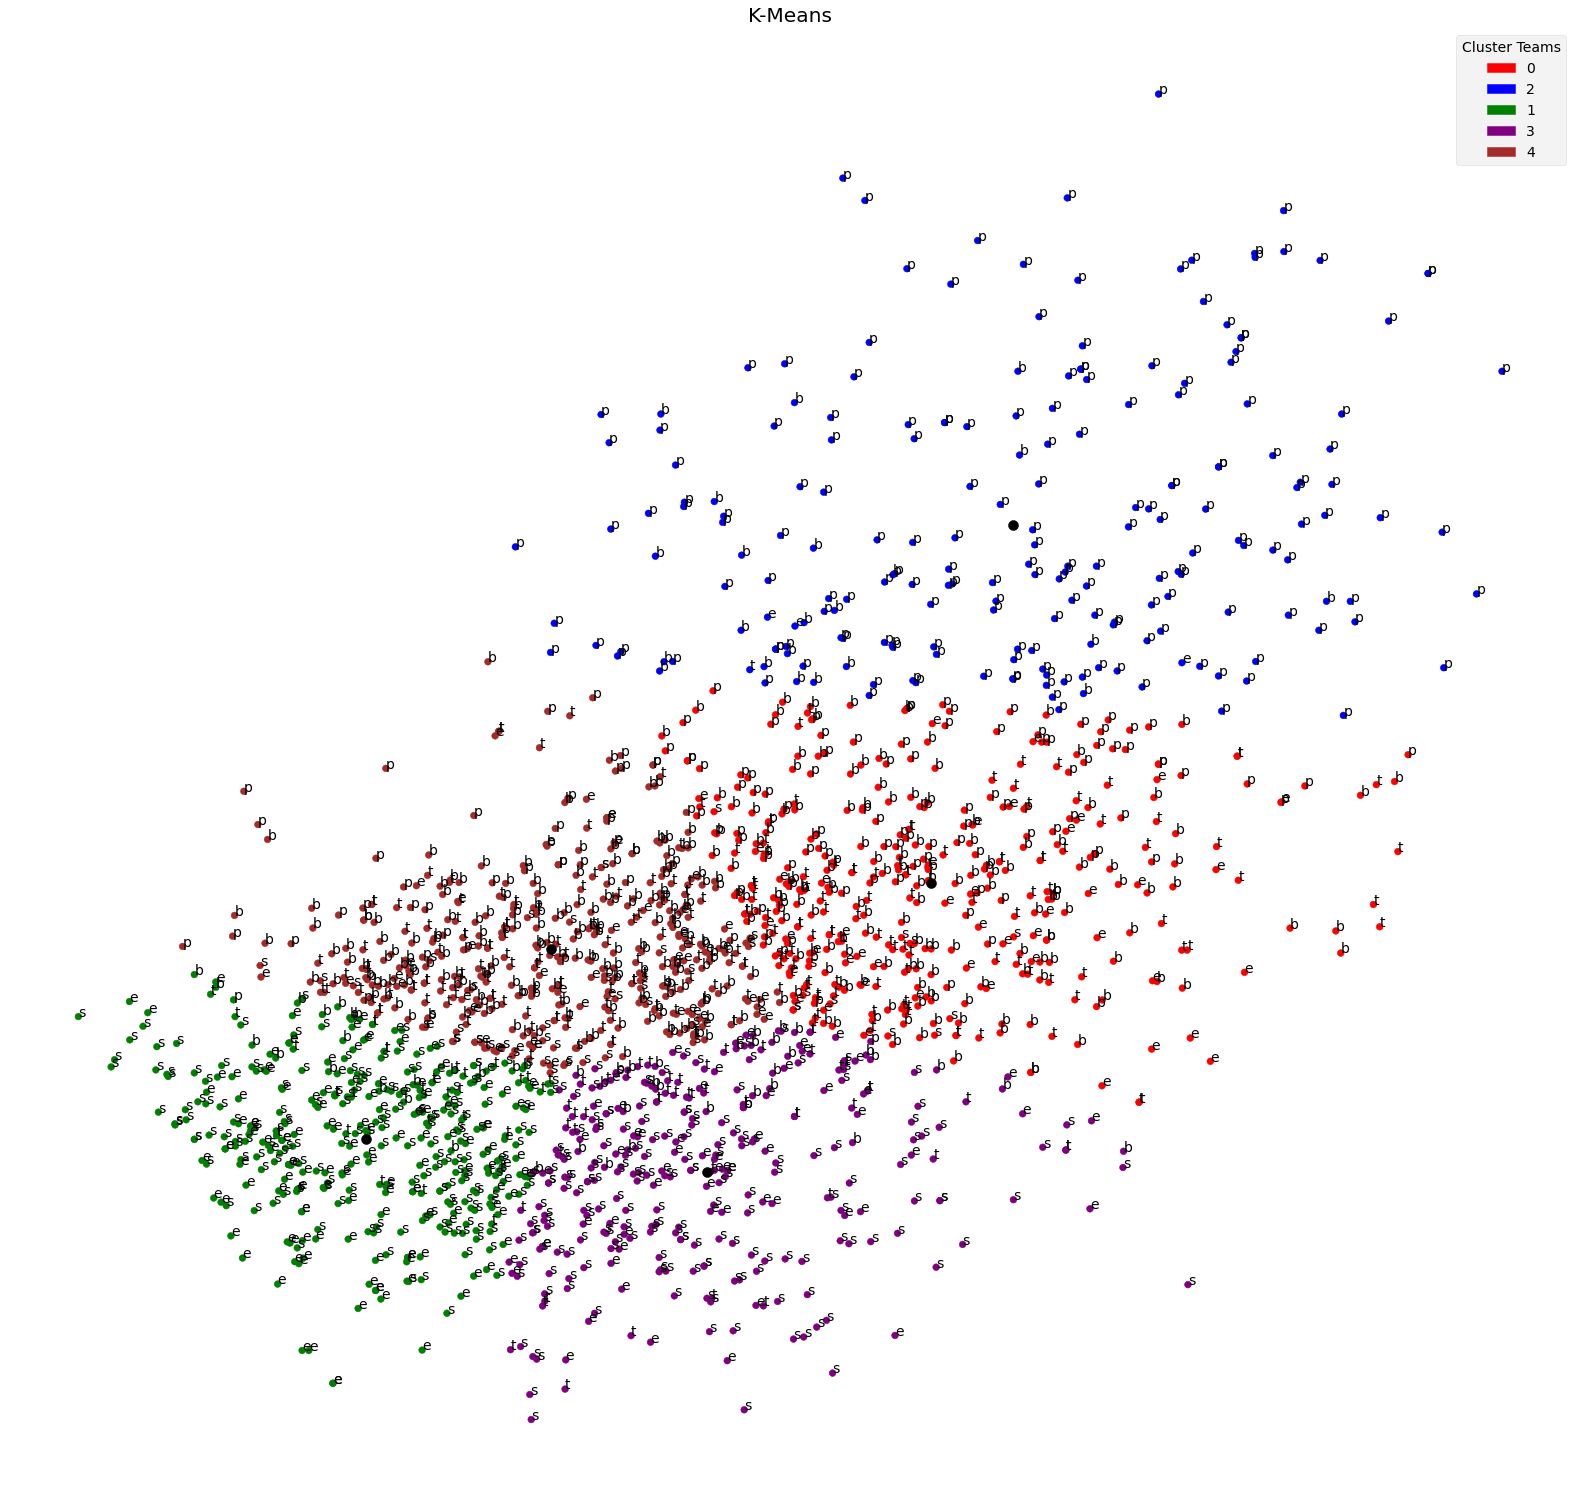

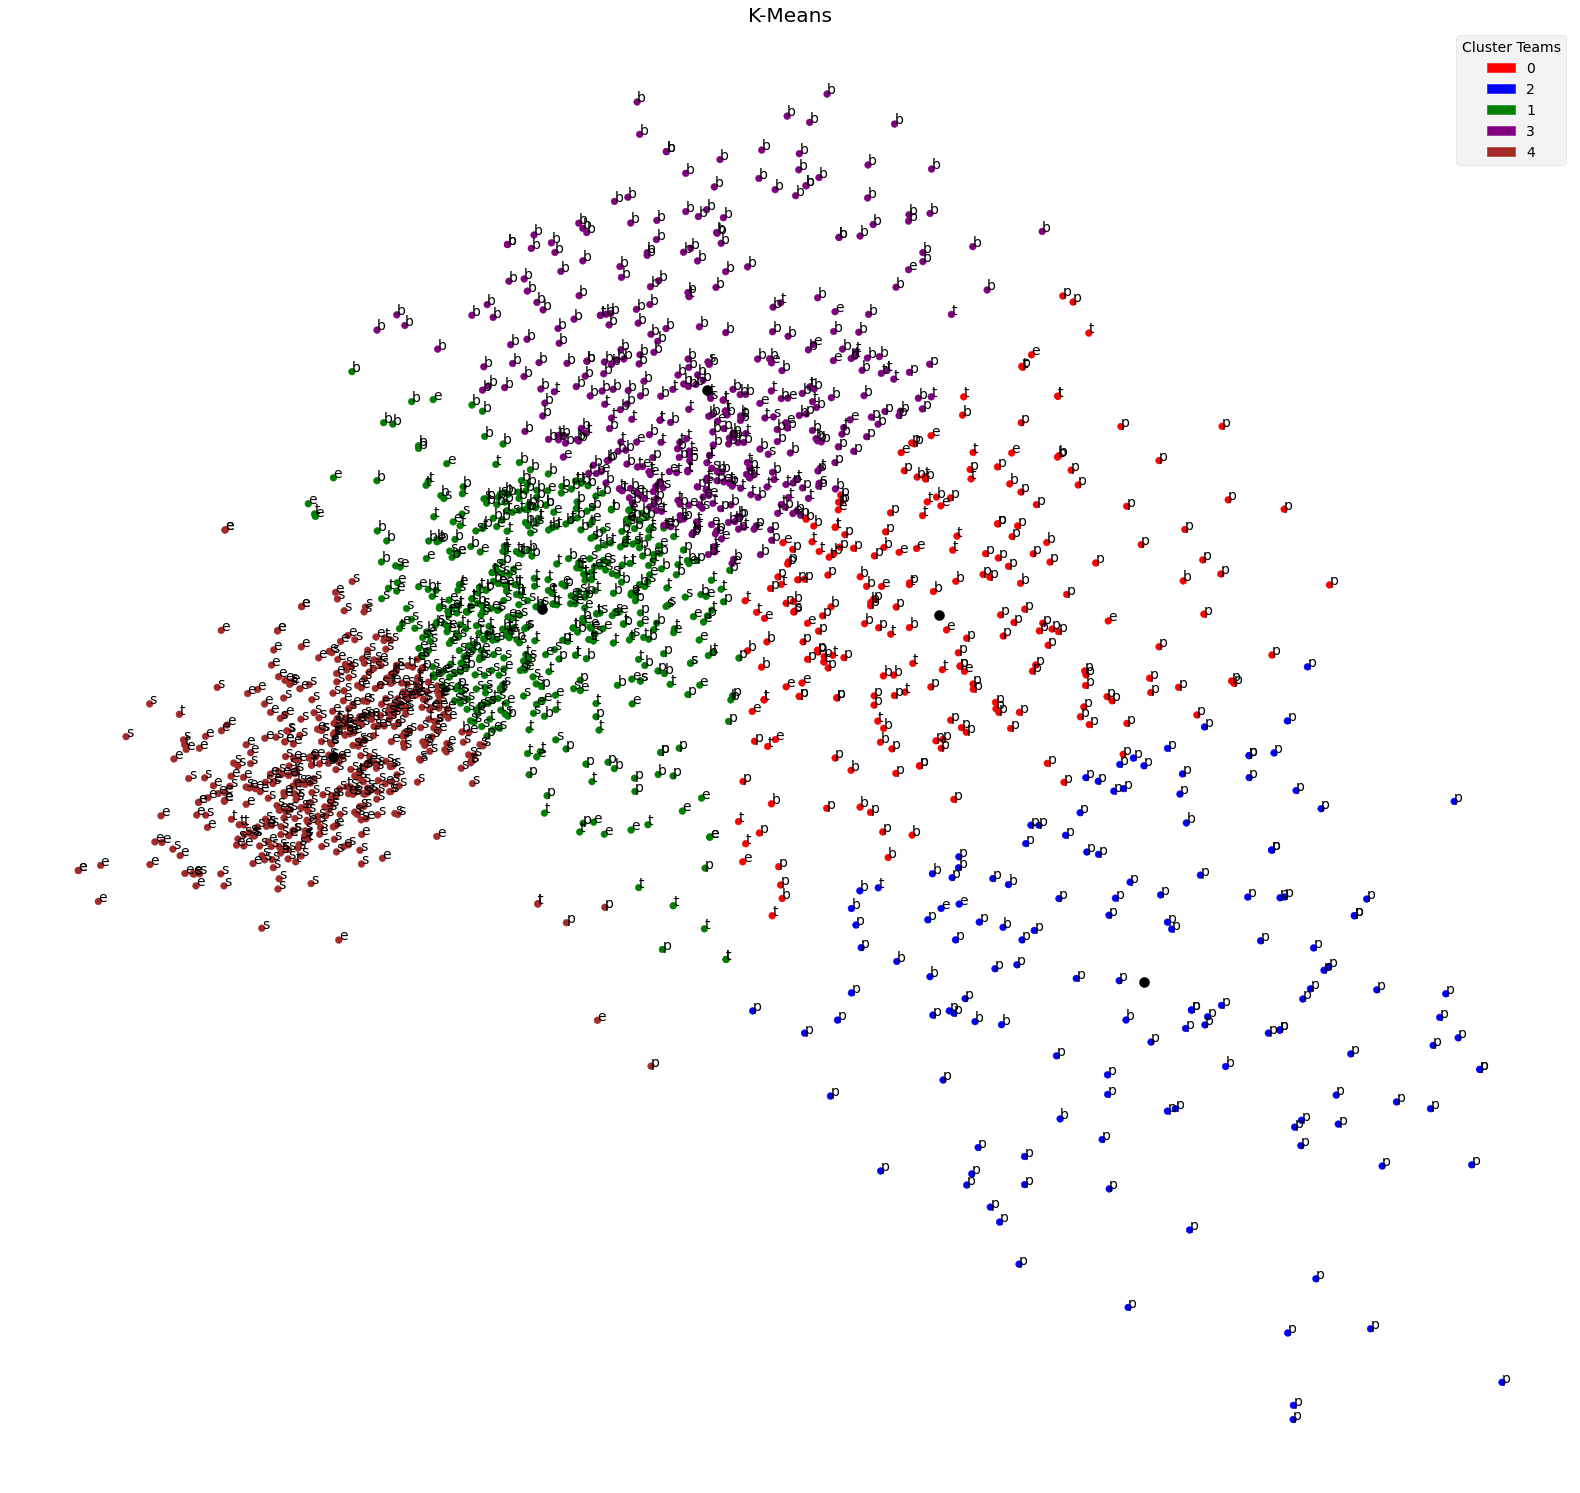

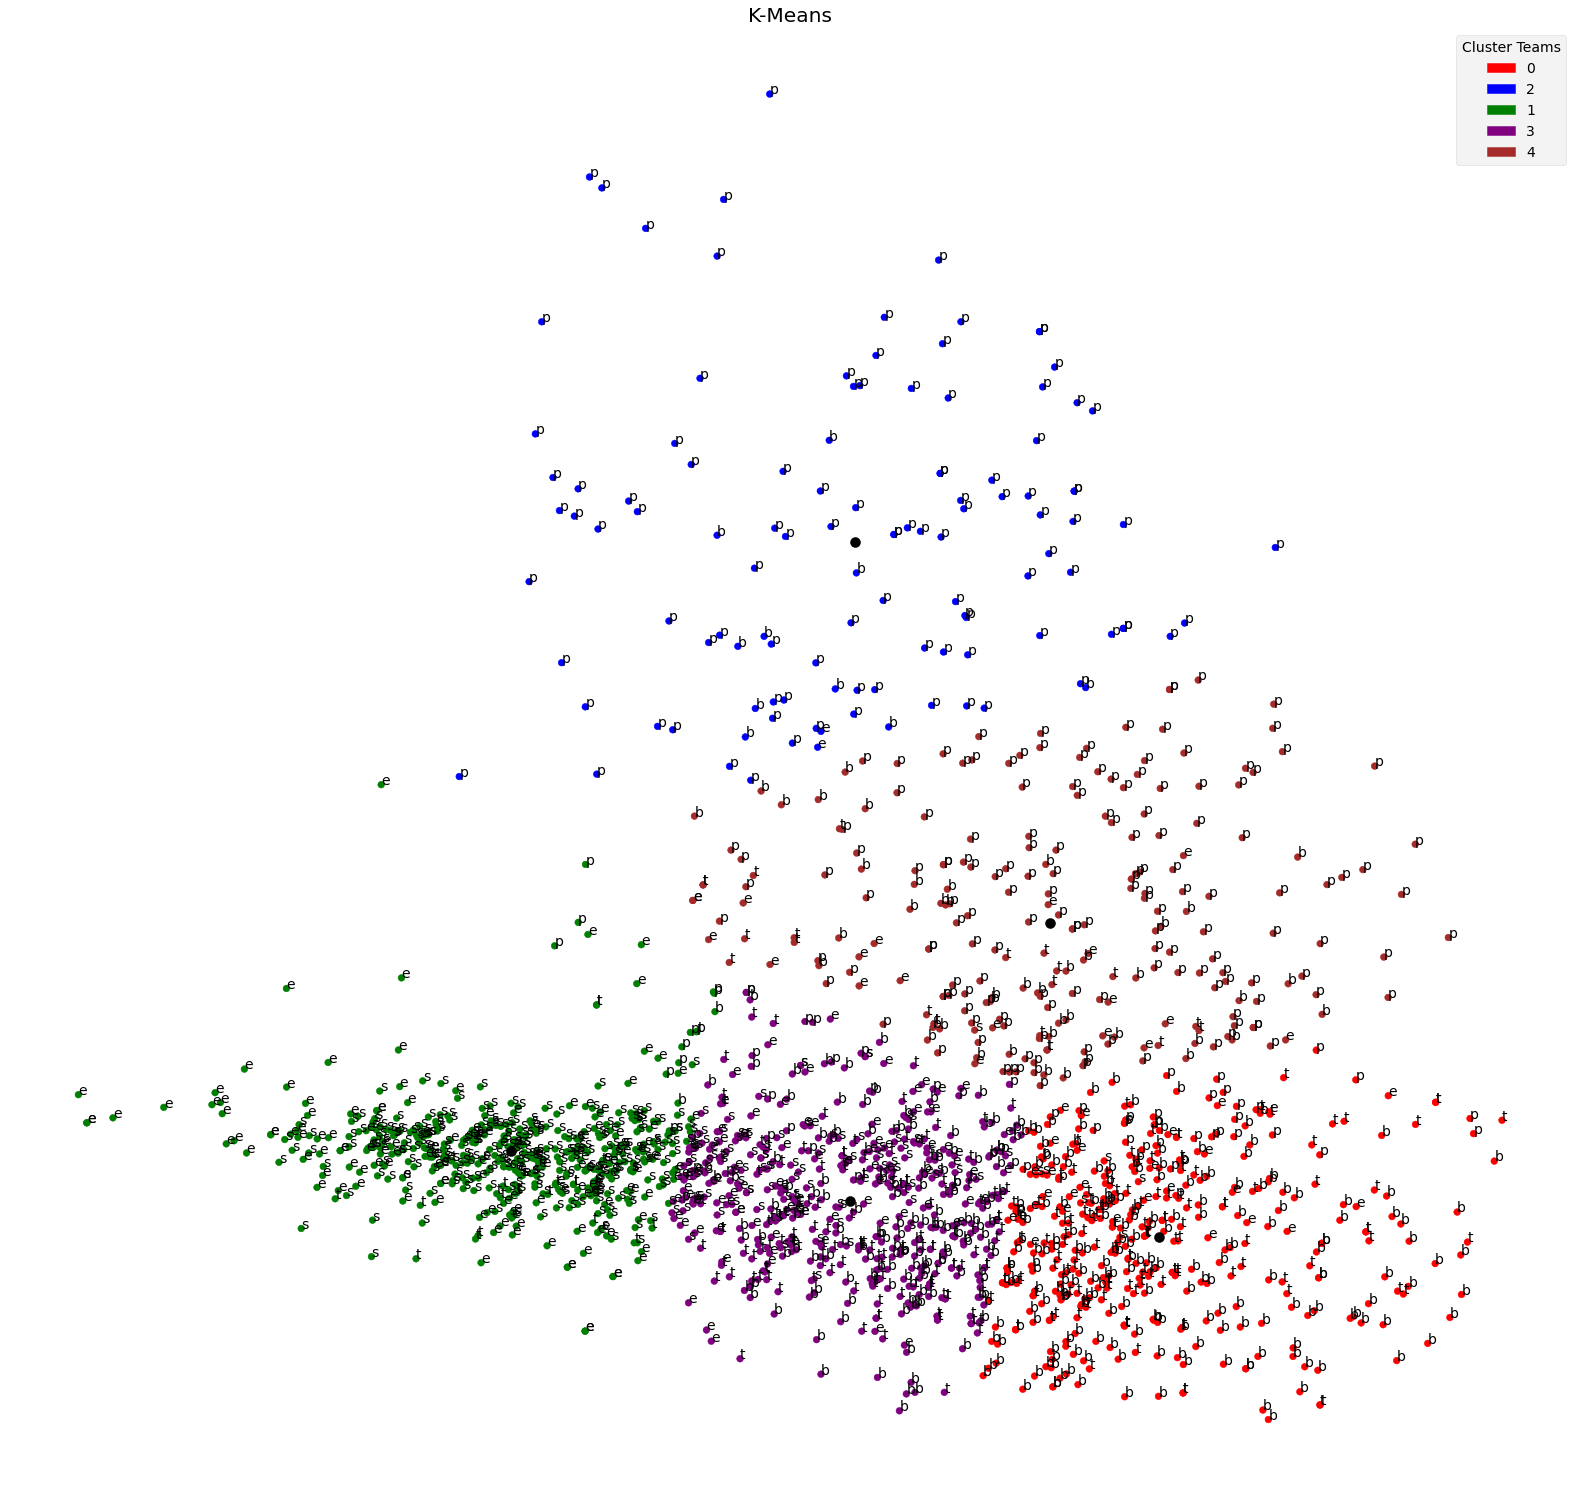

In [ ]:
#The letter in each spot represents the category each documents belongs
stopwords=set(ENGLISH_STOP_WORDS)

#count vectorizer
count_vec=CountVectorizer(stop_words=stopwords,analyzer='word',lowercase=True,min_df=5)
cvec=count_vec.fit_transform(train['Content'])

compression(cvec)



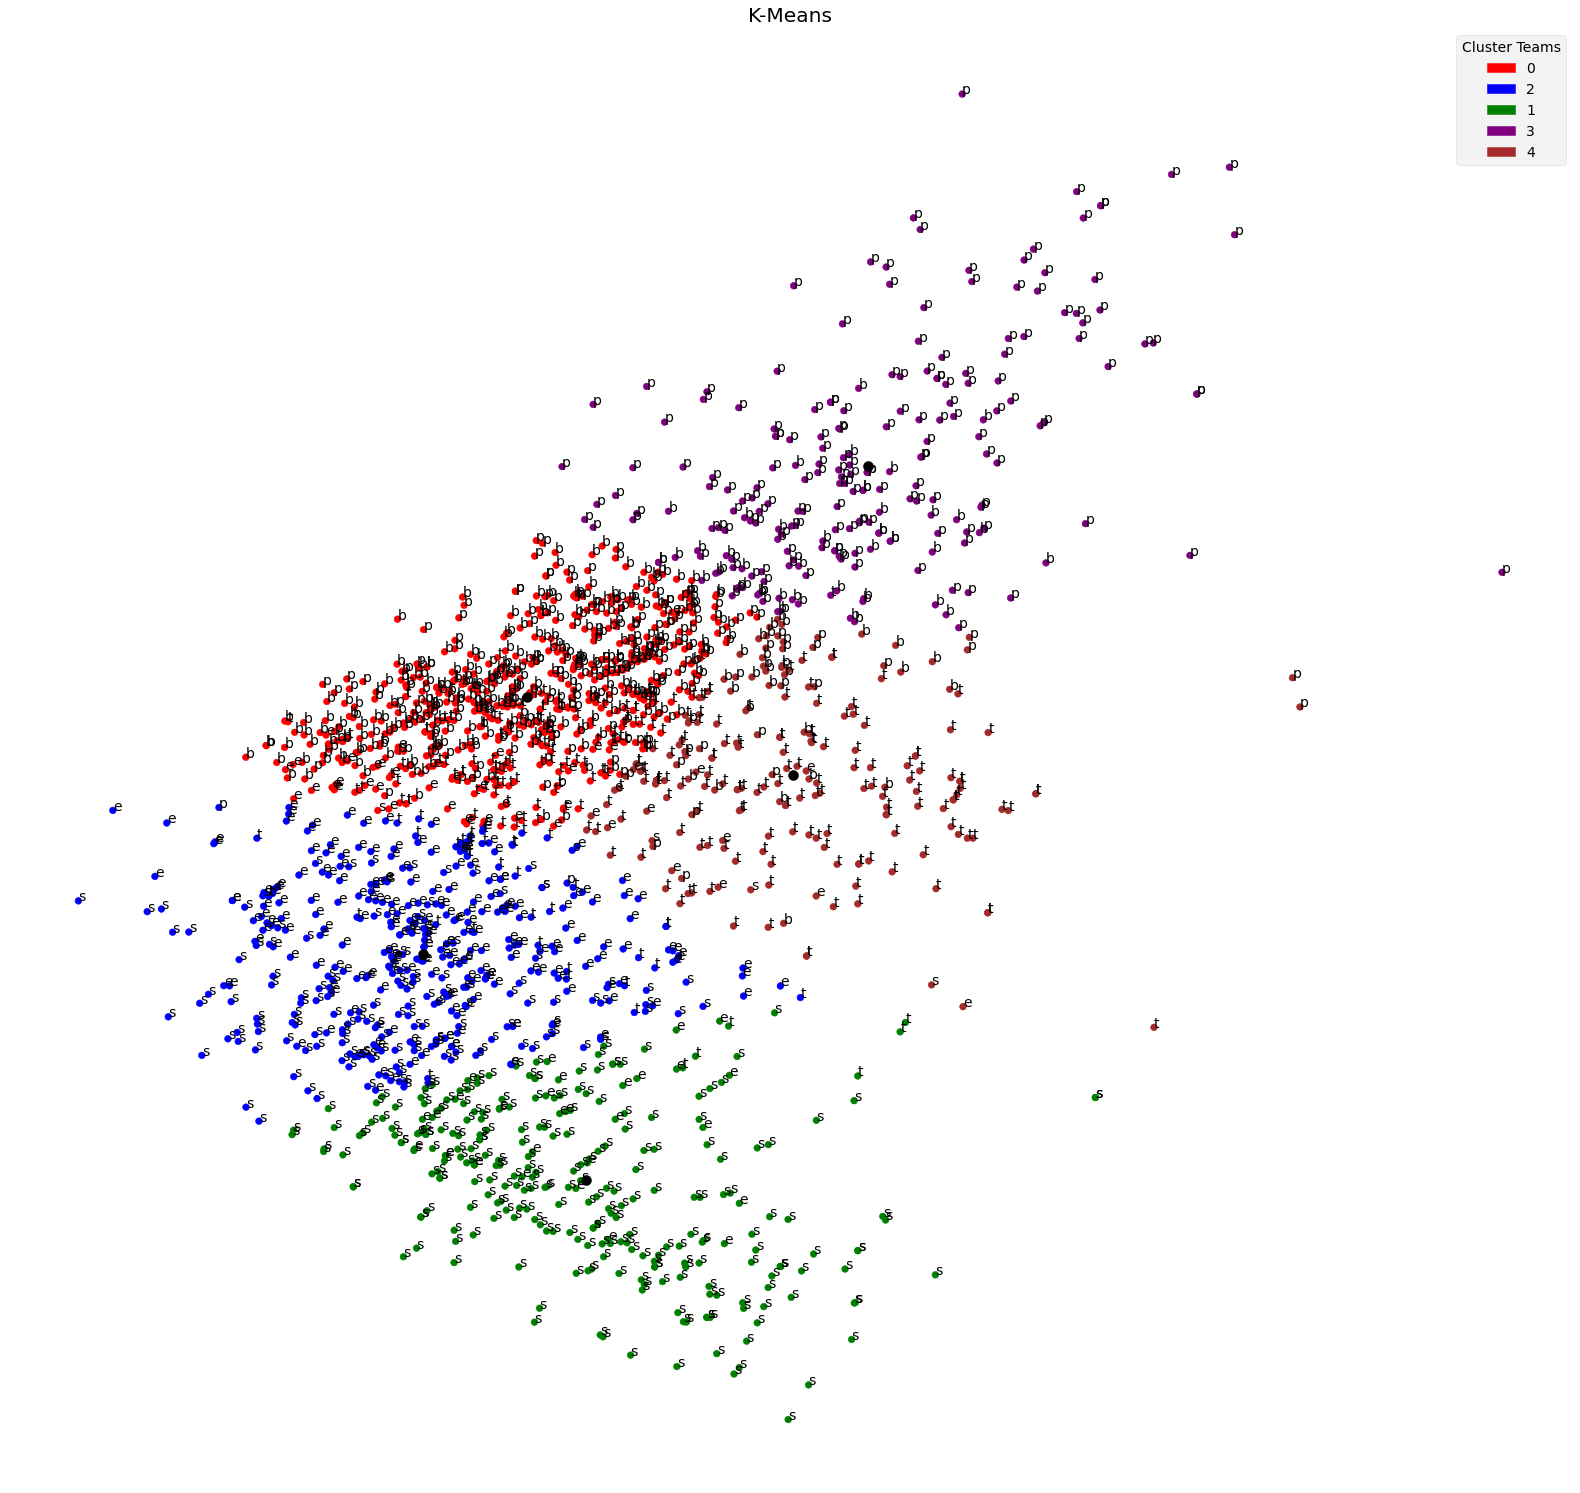

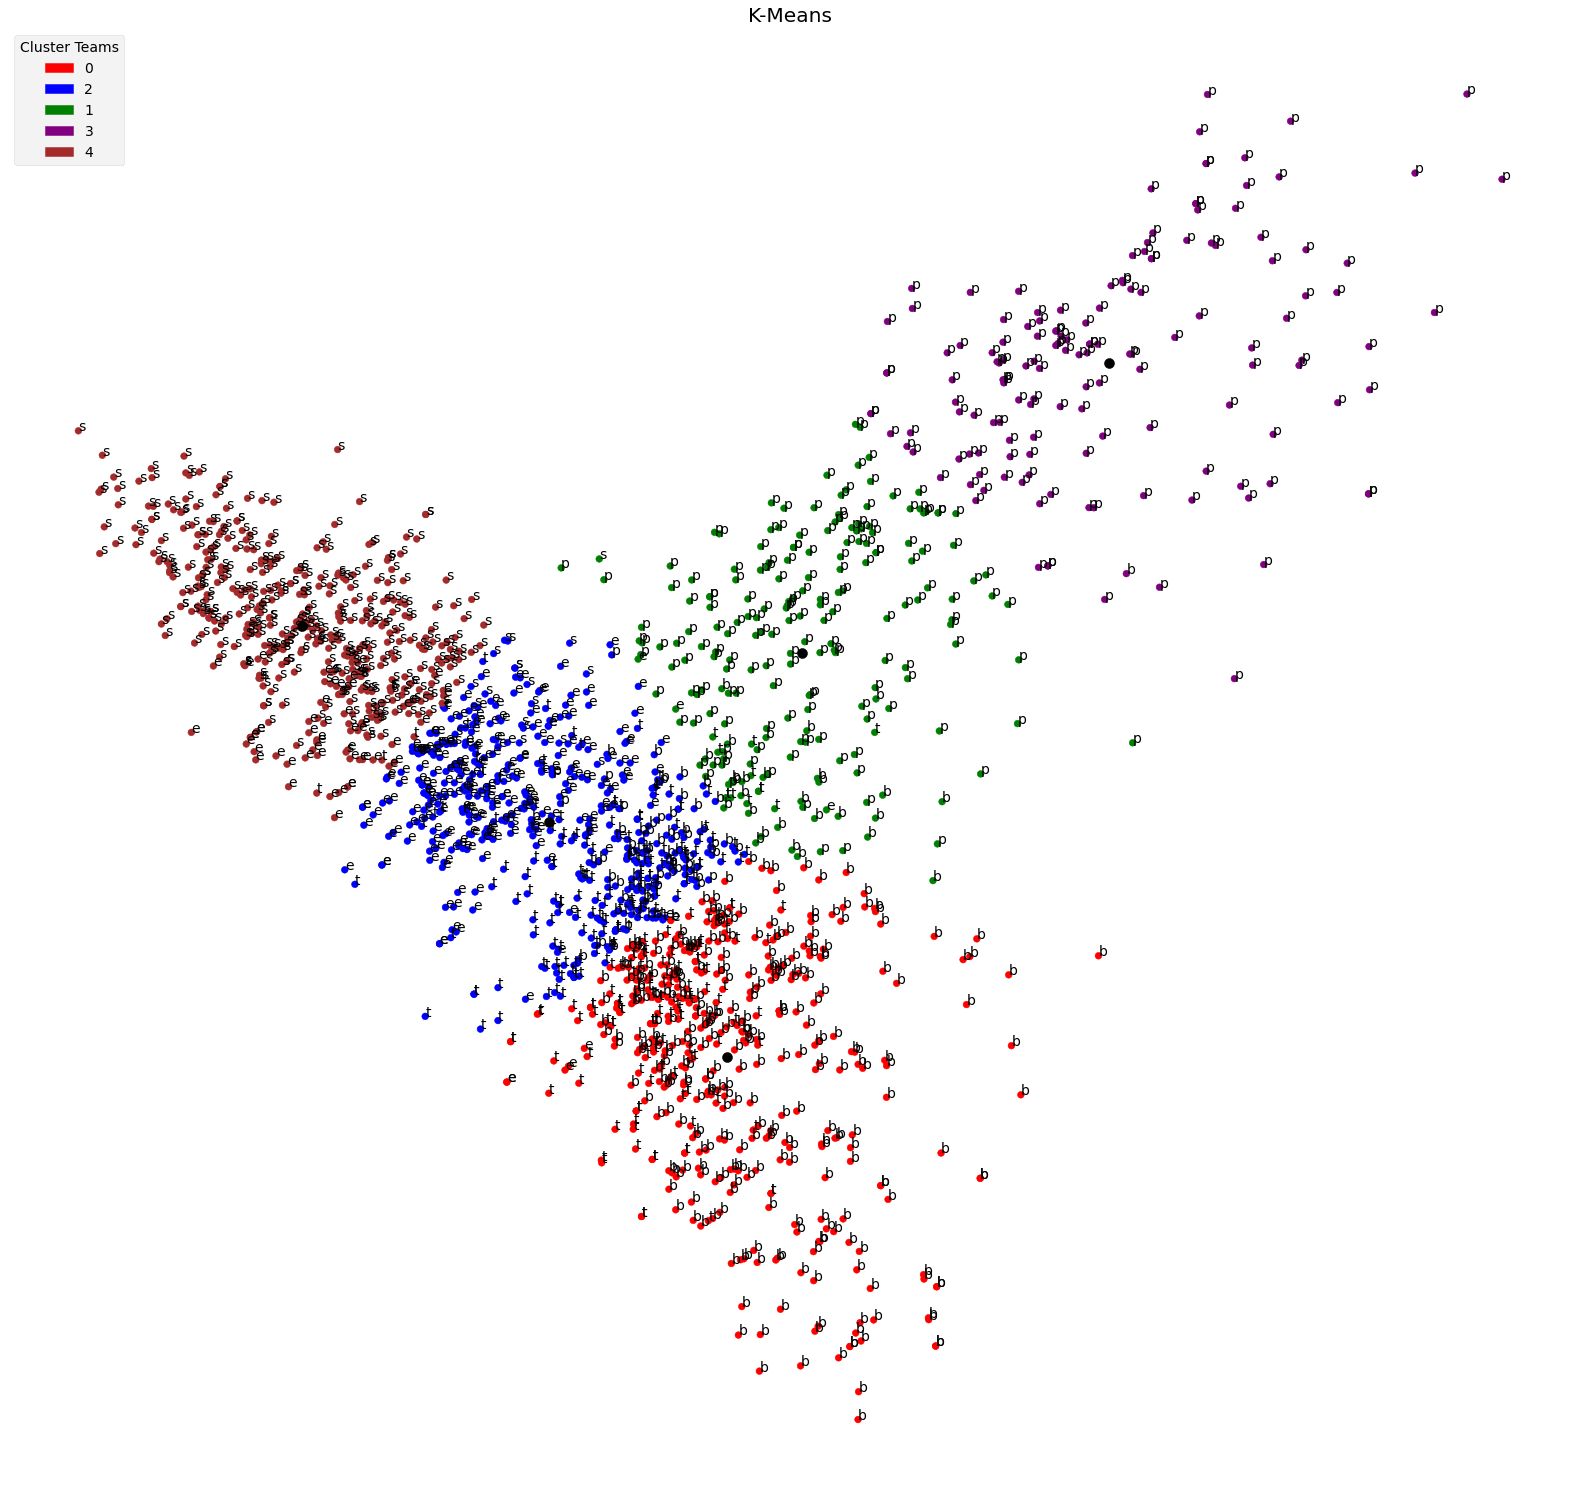

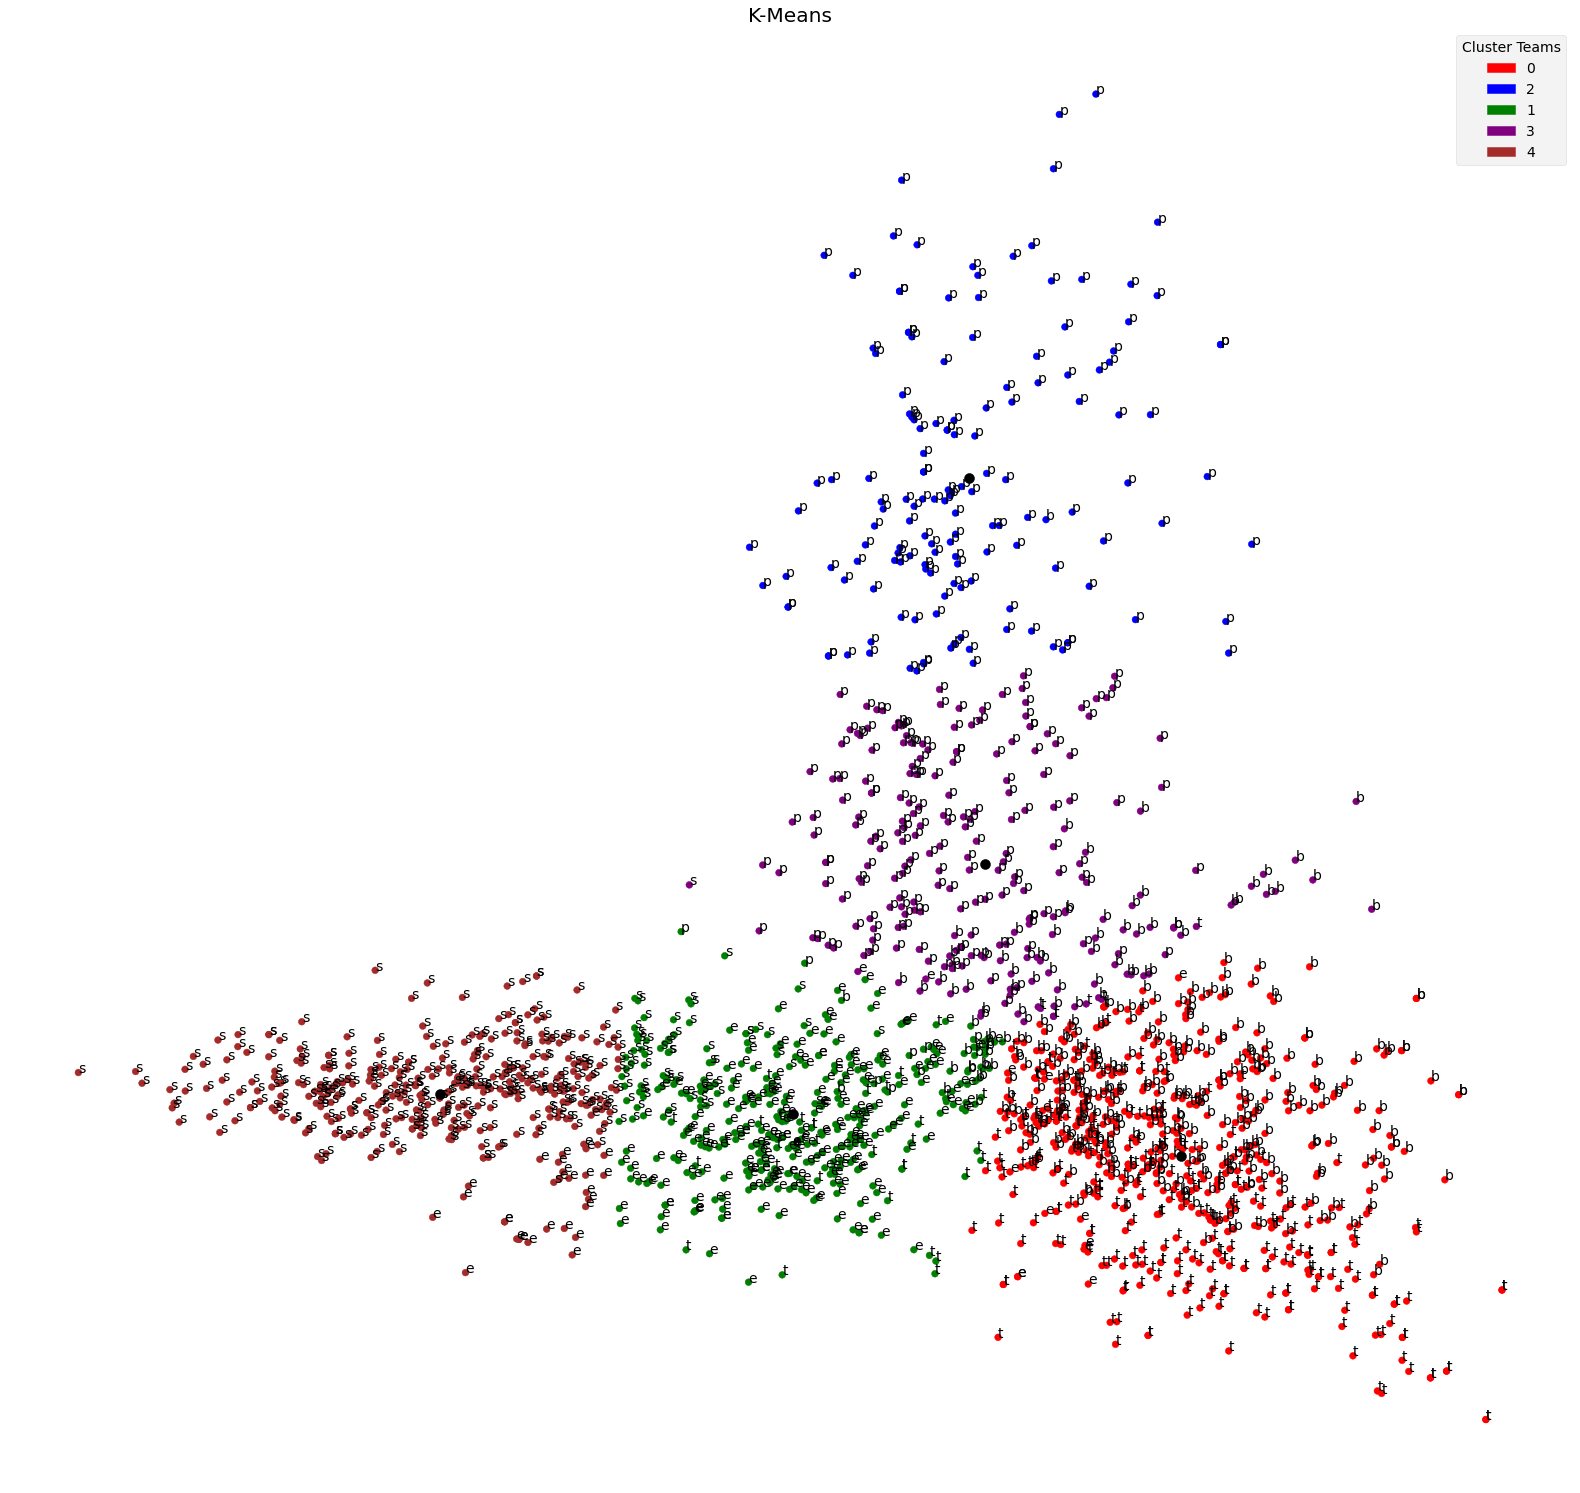

In [ ]:
#tf-idf vectorizer
tfidf_vec = TfidfVectorizer(sublinear_tf=True,max_df=0.5,stop_words = stopwords)
tvec = tfidf_vec.fit_transform(train['Content'])
compression(tvec)


c:\users\teotrelos99\pycharmprojects\untitled18\venv\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


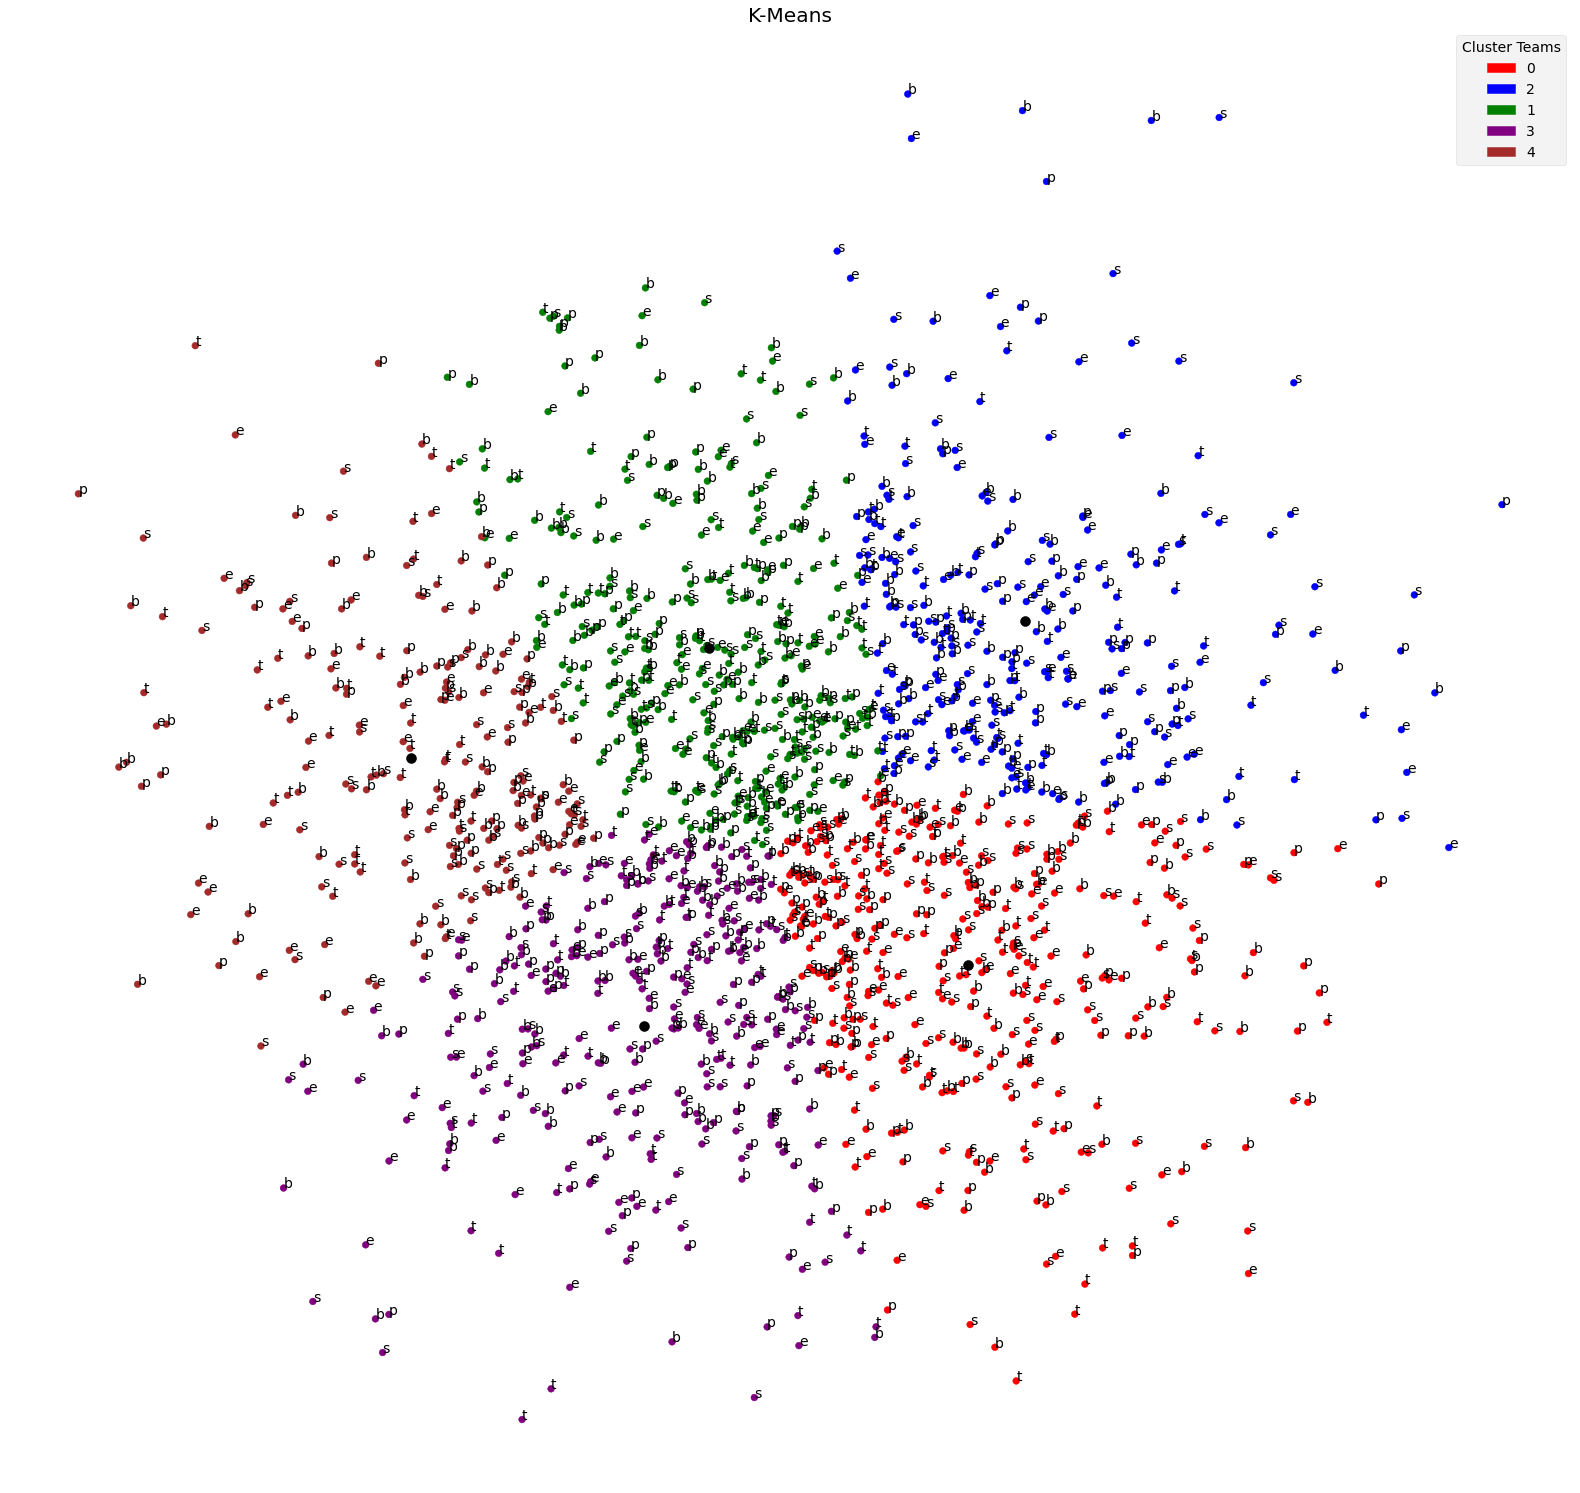

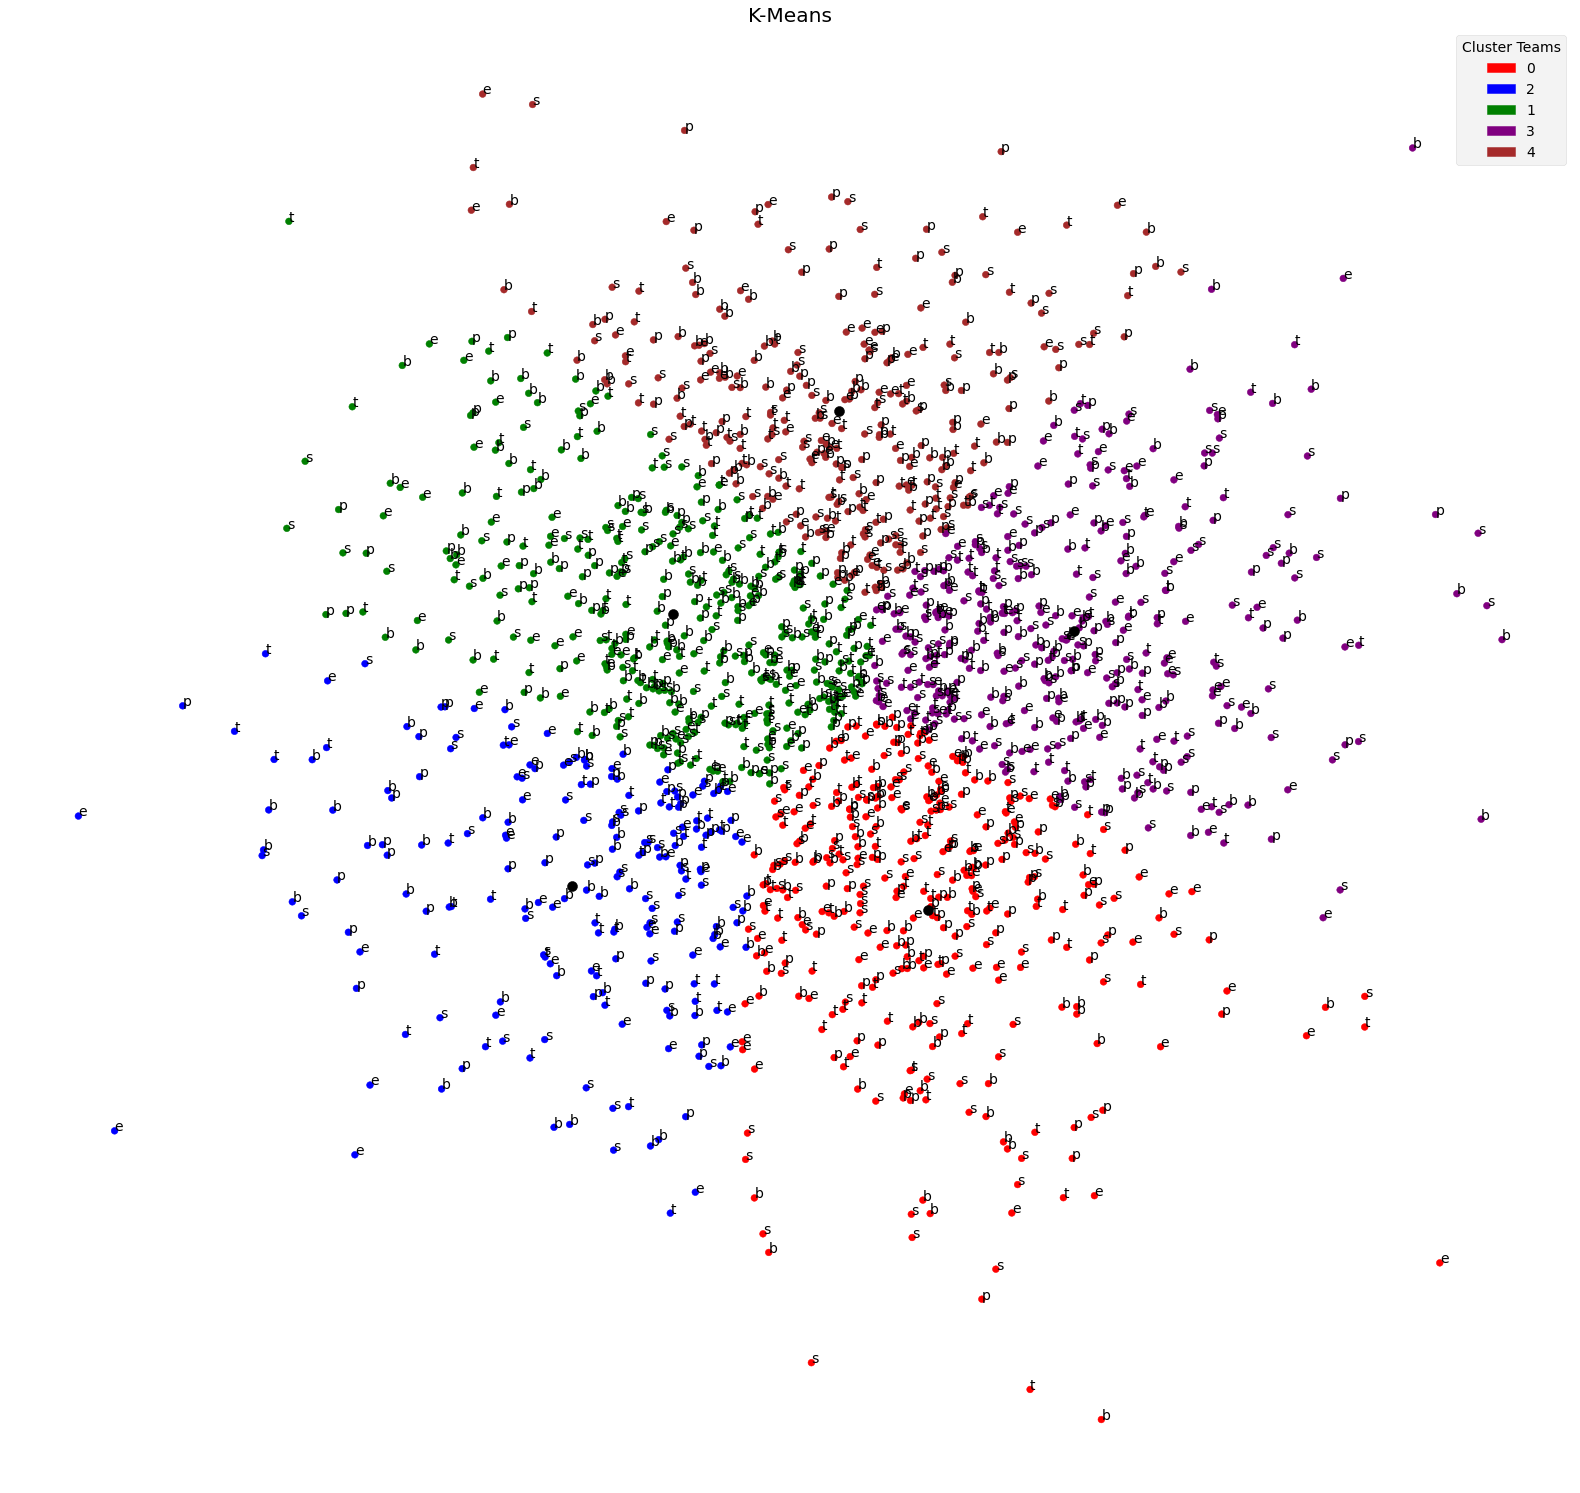

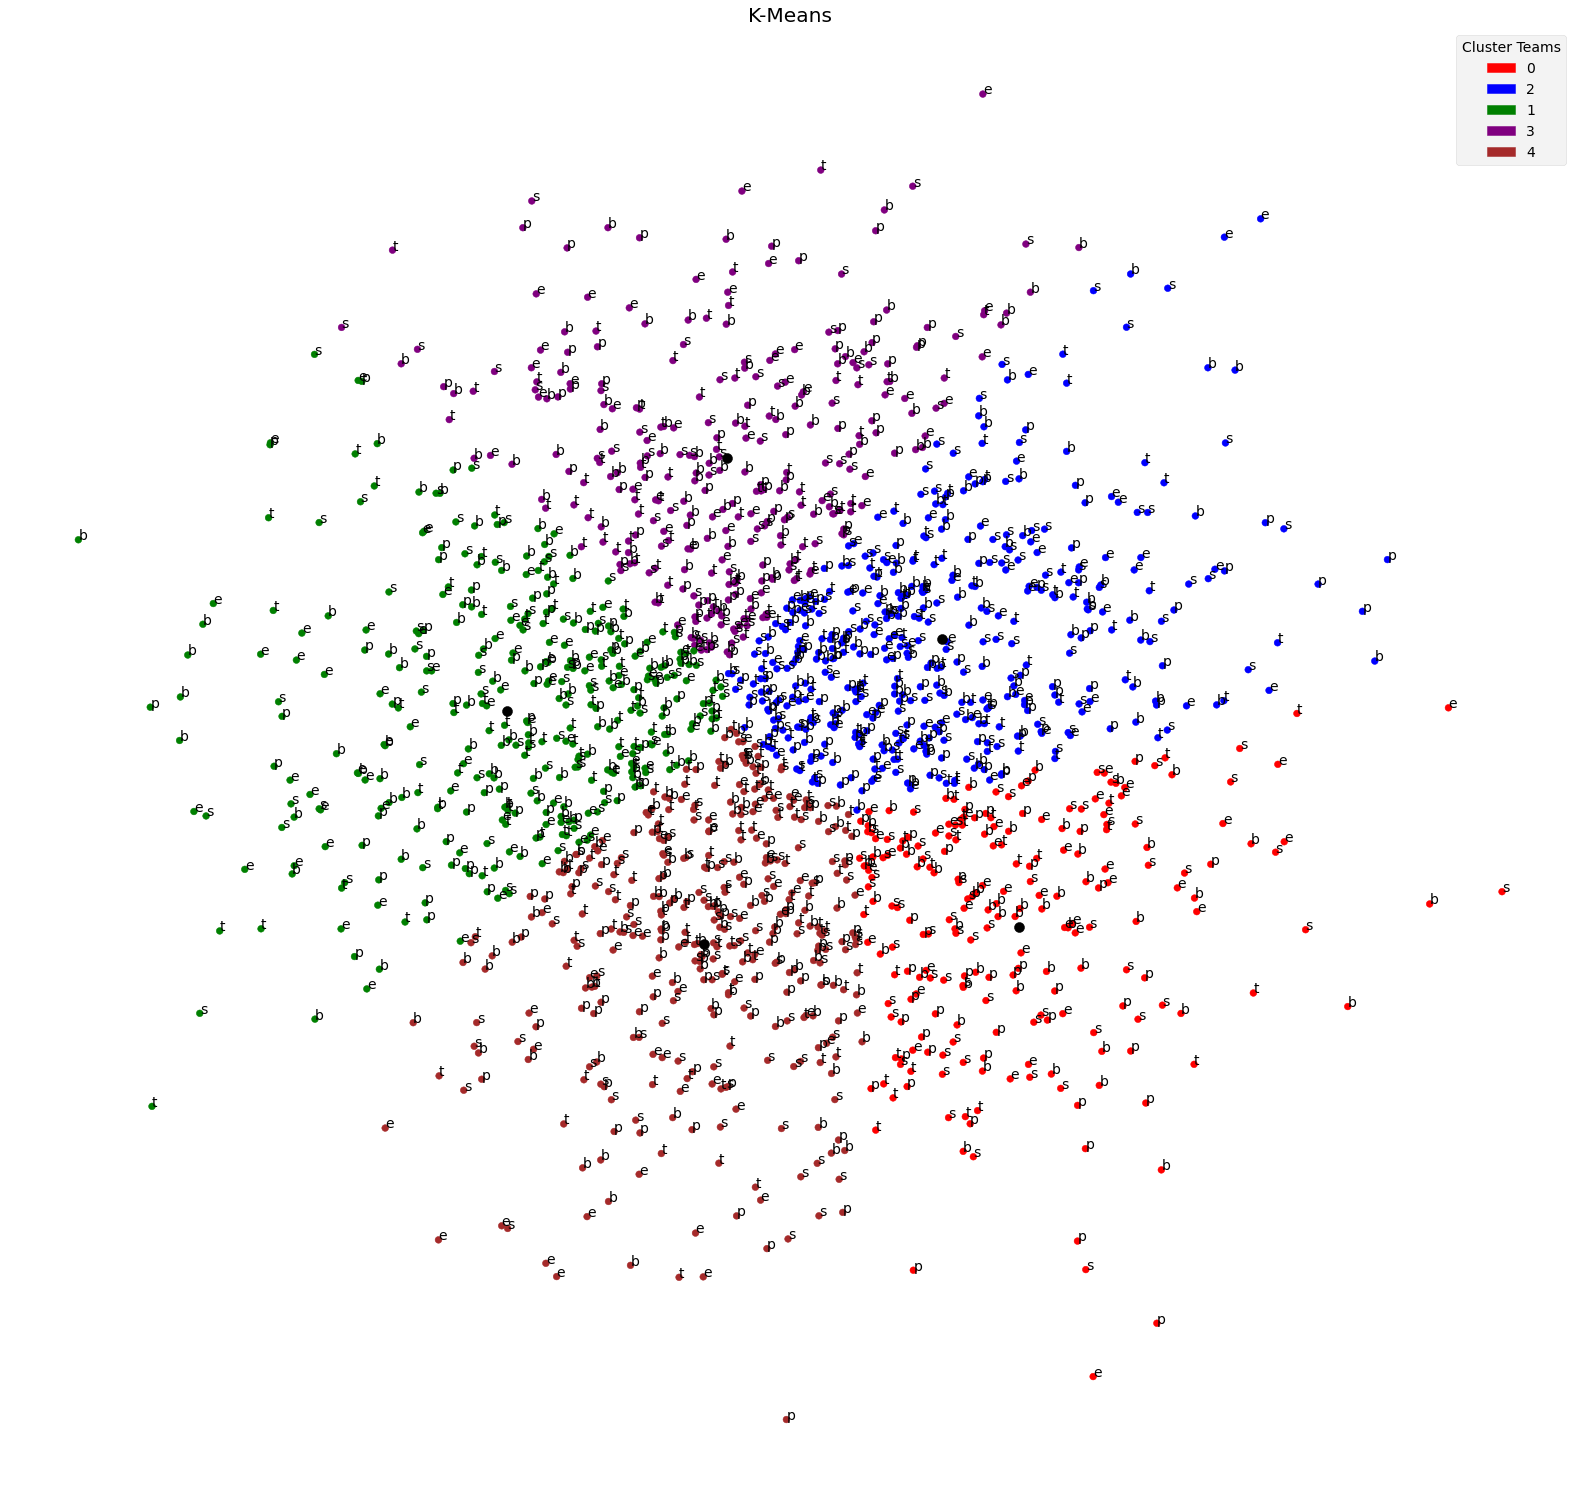

In [ ]:
import gensim 
from gensim.models import Word2Vec 
#word2vec
word_list=train['Content'].tolist()
model1 = gensim.models.Word2Vec([word_list],size=100, window=5, min_count=1, workers=4)

wvec = model1[model1.wv.vocab]
compression(wvec)